# Instalação das Dependências

https://www.python.org/

https://www.tensorflow.org/?hl=pt-br

https://keras.io/

https://www.anaconda.com/

In [1]:
#!pip install -q -U tensorflow
#!pip install -q -U keras
#!pip install -q -U numpy
#!pip install -q -U pandas
!pip install -q -U tensorflow-addons
!pip install -q -U keras-utils


In [2]:
import os
import keras
import numpy as np
import cv2
import PIL
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.layers.convolutional as conv
from math import sqrt
from PIL import Image
from tensorflow import keras
from numpy import mean
from keras.models import Sequential, load_model
from tensorflow.keras import regularizers, layers, Model
from keras.preprocessing import image
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, EarlyStopping
from keras.utils.vis_utils import plot_model
from keras import backend as B
from tensorflow.keras.layers import BatchNormalization, MaxPool2D, ReLU
from tensorflow.keras import Model
from keras.layers import Dense, Add, Conv1D, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, ZeroPadding2D, MaxPooling2D, Activation, Input, UpSampling2D, AveragePooling2D, Reshape, InputLayer, SeparableConv2D
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop, SGD
from keras.regularizers import l2
from keras.initializers import glorot_uniform
from skimage.feature import peak_local_max
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage.exposure import equalize_adapthist
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel, rank, median
from skimage.util import img_as_ubyte
from scipy import ndimage as ndi
from scipy.ndimage import distance_transform_edt
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.metrics import *
from keras import backend as K
from sklearn.metrics import precision_recall_fscore_support, f1_score


# Perceptron

https://psycnet.apa.org/doiLanding?doi=10.1037%2Fh0042519

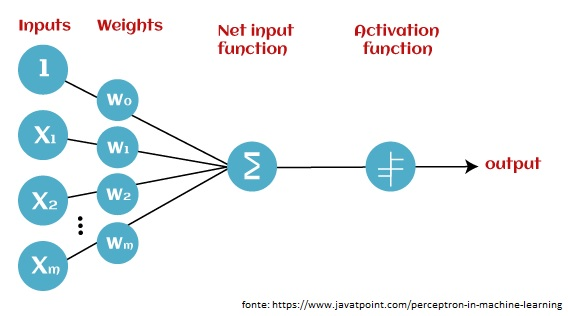

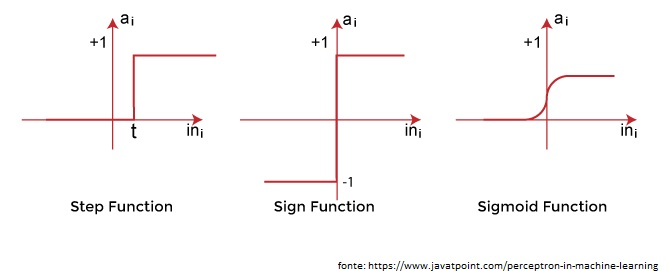

Perceptron 1 camada

In [3]:
entradas = np.array([1, 9, 5])
pesos = np.array([0.8, 0.1, 0])


In [4]:
def soma(e, p):
  return e.dot(p)
  

In [5]:
s = soma(entradas, pesos)


In [6]:
def stepFunction(soma):
  if (s >= 1):
    return 1
  return 0
  

In [7]:
saida = stepFunction(s)


In [8]:
print(s)
print(saida)


1.7000000000000002
1


Perceptron 1 camada - Tabela AND

In [9]:
entradas = np.array([[0,0],
                     [0,1],
                     [1,0],
                     [1,1]])

saidas = np.array([0,0,
                   0,1])

pesos = np.array([0.0,
                  0.0])


In [10]:
taxa_aprendizado = 0.5


In [11]:
def Soma(e,p):
    return e.dot(p)
  
s = Soma(entradas, pesos)


In [12]:
def funcao_degrau(soma):
  if (soma >= 1):
    return 1
  return 0


In [13]:
def calculo_saida(reg):
  s = reg.dot(pesos)
  return funcao_degrau(s)
  

In [14]:
def calcula_e_atualiza():
  erro_total = 1
  while (erro_total != 0):
    erro_total = 0

    for i in range (len(saidas)):
      calc_saida = calculo_saida(np.array(entradas[i]))
      erro = abs(saidas[i] - calc_saida)
      erro_total += erro

      for j in range(len(pesos)):
        pesos[j] = pesos[j] + (taxa_aprendizado * entradas[i][j] * erro)
        print('Pesos Atualizados > ' + str(pesos[j]))
        
    print('Total de Erros: ' + str(erro_total))

calcula_e_atualiza()


Pesos Atualizados > 0.0
Pesos Atualizados > 0.0
Pesos Atualizados > 0.0
Pesos Atualizados > 0.0
Pesos Atualizados > 0.0
Pesos Atualizados > 0.0
Pesos Atualizados > 0.5
Pesos Atualizados > 0.5
Total de Erros: 1
Pesos Atualizados > 0.5
Pesos Atualizados > 0.5
Pesos Atualizados > 0.5
Pesos Atualizados > 0.5
Pesos Atualizados > 0.5
Pesos Atualizados > 0.5
Pesos Atualizados > 0.5
Pesos Atualizados > 0.5
Total de Erros: 0


Perceptron Multicamada - Tabela XOR

In [15]:
entradas = np.array([[0,0],
                     [0,1],
                     [1,0],
                     [1,1]])

saidas = np.array([[0],
                   [1],
                   [1],
                   [0]])

pesos0 = np.array([[-0.424, -0.740, -0.961],
                   [0.358, -0.577, -0.469]])

pesos1 = np.array([[-0.017],
                   [-0.893],
                   [0.148]])


In [16]:
ntreinos = 10000
taxaAprendizado = 0.4
momentum = 1


In [17]:
def sigmoid(soma):
    return 1 / (1 + np.exp(-soma))
    

In [18]:
def sigmoideDerivada(sig):
    return sig * (1-sig)
    
sigDerivada = sigmoid(0.5)
sigDerivada1 = sigmoideDerivada(sigDerivada)


In [19]:
for i in range(ntreinos):
    camadaEntrada = entradas
    somaSinapse0 = np.dot(camadaEntrada, pesos0)
    camadaOculta = sigmoid(somaSinapse0)
    
    somaSinapse1 = np.dot(camadaOculta, pesos1)
    camadaSaida = sigmoid(somaSinapse1)
    
    erroCamadaSaida = saidas - camadaSaida
    mediaAbsoluta = np.mean(np.abs(erroCamadaSaida))
    
    derivadaSaida = sigmoideDerivada(camadaSaida)
    deltaSaida = erroCamadaSaida * derivadaSaida

    pesos1Transposta = pesos1.T
    deltaSaidaXpesos = deltaSaida.dot(pesos1Transposta)
    deltaCamadaOculta = deltaSaidaXpesos * sigmoideDerivada(camadaOculta)

    camadaOcultaTransposta = camadaOculta.T
    pesos3 = camadaOcultaTransposta.dot(deltaSaida)
    pesos1 = (pesos1 * momentum) + (pesos3 * taxaAprendizado)

    camadaEntradaTransposta = camadaEntrada.T
    pesos4 = camadaEntradaTransposta.dot(deltaCamadaOculta)
    pesos0 = (pesos0 * momentum) + (pesos4 * taxaAprendizado)
    
    print(f'Margem de Erro: {str(mediaAbsoluta)}')


A saída de streaming foi truncada nas últimas 5000 linhas.
Margem de Erro: 0.16461141697334997
Margem de Erro: 0.16460527404462066
Margem de Erro: 0.16459913393652154
Margem de Erro: 0.16459299664689564
Margem de Erro: 0.16458686217358798
Margem de Erro: 0.16458073051444608
Margem de Erro: 0.16457460166731996
Margem de Erro: 0.16456847563006166
Margem de Erro: 0.16456235240052555
Margem de Erro: 0.16455623197656838
Margem de Erro: 0.16455011435604916
Margem de Erro: 0.16454399953682908
Margem de Erro: 0.164537887516772
Margem de Erro: 0.16453177829374346
Margem de Erro: 0.1645256718656117
Margem de Erro: 0.1645195682302471
Margem de Erro: 0.16451346738552247
Margem de Erro: 0.16450736932931265
Margem de Erro: 0.16450127405949483
Margem de Erro: 0.1644951815739485
Margem de Erro: 0.16448909187055538
Margem de Erro: 0.16448300494719947
Margem de Erro: 0.16447692080176707
Margem de Erro: 0.16447083943214658
Margem de Erro: 0.16446476083622874
Margem de Erro: 0.1644586850119065
Margem de E

# Redes Neurais Artificiais

## Regressão Linear

https://keras.io/api/datasets/boston_housing/

http://lib.stat.cmu.edu/datasets/boston

Dados de preços de casas em Boston, de Harrison, D. e Rubinfeld, D.L. para o artigo 'Preços hedônicos e a demanda por ar limpo', J. Environ. Economia e Gestão, vol.5, 81-102, 1978.

- Taxa de criminalidade per capita por cidade.
- Proporção em relação a terrenos residenciais zoneados em lotes acima de 25.000 pés quadrados.
- Proporção em relação a hectares de terrenos não varejistas por cidade
- Proporção em relação a terrenos alocados com rios
- Concentração de óxidos nítricos medidos no terreno (partes por 10 milhões)
- Número médio de quartos por habitação no mesmo loteamento
- Proporção de unidades ocupadas (loteamento) e construídas antes de 1940
- Distâncias ponderadas para cinco centros de emprego de Boston
- Índice de acessibilidade às rodovias radiais
- Taxa média de imposto de propriedade de valor (escalonado por 10.000)
- Proporção alunos por professor por cidade
- Proporção de negros por cidade (por mil habitantes)
- Percentual de status mais baixo da população
- Valor médio de casas (escalonado por 1.000)


O objetivo é usar a regressão linear para encontrar o valor médio das casas ocupadas pelos proprietários em 1.000 USD.

In [20]:
# Importação das bibliotecas, módulos e pacotes
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


In [21]:
print(f'Versão da biblioteca TensorFlow: {tf.__version__}')


Versão da biblioteca TensorFlow: 2.11.0


In [22]:
# Carregamento da base de dados
data = tf.keras.datasets.boston_housing

# Divisão em base para treino e para teste
(x_train, y_train), (x_test, y_test) = data.load_data()

# https://keras.io/api/datasets/boston_housing/

57026/57026 [==============================] - 0s 0us/step


In [23]:
# Tipo de dado
print(type(x_train))


<class 'numpy.ndarray'>


In [24]:
# Formato dos dados de treino
print(x_train.shape)


(404, 13)


In [25]:
# Formato dos dados de teste
print(x_test.shape)


(102, 13)


In [26]:
# Primeira amostra da base de treino
print(x_train[0])


[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [27]:
# Primeira amostra da base de teste
print(y_test[0])


7.2


In [28]:
# Normalização através da média e desvio padrão
media = x_train.mean(axis = 0)
desvio = x_train.std(axis = 0)

x_train = (x_train - media) / desvio
x_test = (x_test - media) / desvio

# https://numpy.org/doc/stable/reference/generated/numpy.mean.html
# https://numpy.org/doc/stable/reference/generated/numpy.std.html

In [29]:
# Definição do modelo
model = Sequential([
  Dense(units = 64,
        activation = 'relu',
        input_shape = [13]),
  Dense(units = 64,
        activation = 'relu'),
  Dense(units = 1)
])

# https://keras.io/api/models/sequential/#sequential-class
# https://keras.io/api/layers/core_layers/dense/
# https://keras.io/api/layers/activations/

In [30]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


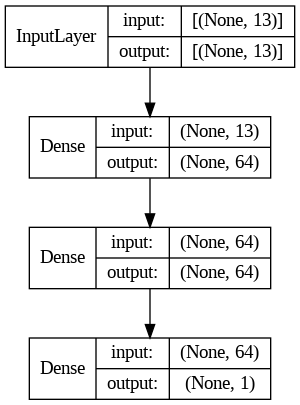

In [31]:
plot_model(model,
           to_file = 'model.png',
           show_shapes = True,
           show_layer_names = False)


In [32]:
model.compile(optimizer = 'adam',
              loss = 'mse', # erro quadrático médio
              metrics = ['mae']) # erro absoluto médio

# https://keras.io/api/optimizers/
# https://keras.io/api/losses/
# https://keras.io/api/metrics/

In [33]:
%time

history = model.fit(x_train,
                    y_train,
                    epochs = 100,
                    validation_split = 0.2)


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.48 µs
Epoch 1/100
11/11 [==============================] - 2s 22ms/step - loss: 559.5222 - mae: 21.8711 - val_loss: 610.8448 - val_mae: 22.9807
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 526.3118 - mae: 21.1076 - val_loss: 575.5898 - val_mae: 22.2103
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 489.0027 - mae: 20.2153 - val_loss: 529.9011 - val_mae: 21.1693
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 438.0543 - mae: 18.9693 - val_loss: 466.5562 - val_mae: 19.6384
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 370.8217 - mae: 17.2068 - val_loss: 385.5512 - val_mae: 17.5577
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 289.7741 - mae: 14.9017 - val_loss: 294.5287 - val_mae: 14.7830
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 205.1423 - mae: 12.0329 - val_loss: 205.

In [34]:
print(history.history.keys())
print(history.history)


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
{'loss': [559.522216796875, 526.3118286132812, 489.00274658203125, 438.0542907714844, 370.8217468261719, 289.7740783691406, 205.14234924316406, 136.87307739257812, 95.9847412109375, 77.29354095458984, 64.23384094238281, 53.61085510253906, 44.14748001098633, 37.82944107055664, 33.67137145996094, 30.303333282470703, 28.15679931640625, 26.49042510986328, 25.044910430908203, 24.38068389892578, 23.29897117614746, 22.140640258789062, 21.386667251586914, 20.86647605895996, 20.274621963500977, 19.72963523864746, 19.316438674926758, 18.666940689086914, 18.23967933654785, 17.796411514282227, 17.33292007446289, 17.01870346069336, 16.633281707763672, 16.04376792907715, 15.671926498413086, 15.408355712890625, 14.928958892822266, 14.58546257019043, 14.346870422363281, 13.956966400146484, 13.715270042419434, 13.57510757446289, 13.038589477539062, 12.948710441589355, 12.597729682922363, 12.458434104919434, 12.199322700500488, 12.119668960571289, 11.833

In [35]:
loss, mae = model.evaluate(x_test,
                           y_test)


4/4 [==============================] - 0s 3ms/step - loss: 22.6585 - mae: 3.0204


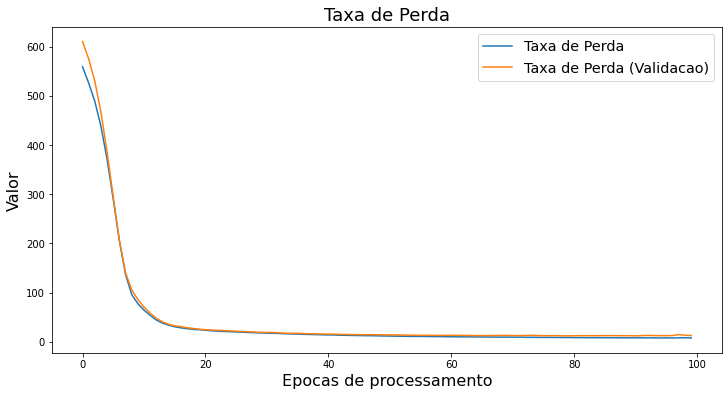

In [36]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Taxa de Perda',
            'Taxa de Perda (Validacao)'],
           loc = 'upper right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Valor', fontsize=16)
plt.title('Taxa de Perda', fontsize=18)
plt.show()


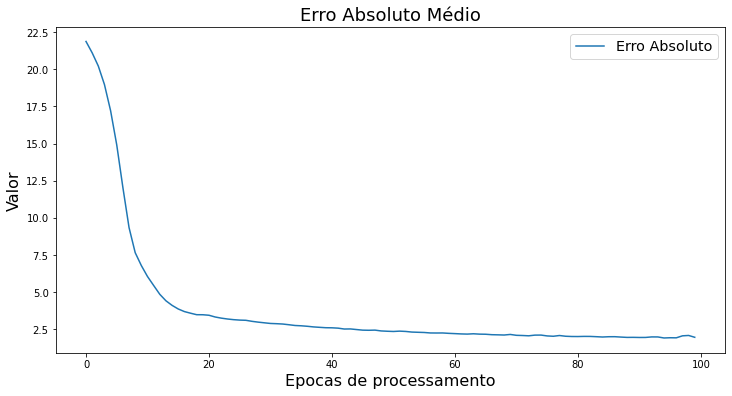

In [37]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(history.history['mae'])
plt.legend(['Erro Absoluto'],
           loc = 'upper right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Valor', fontsize=16)
plt.title('Erro Absoluto Médio', fontsize=18)
plt.show()


In [38]:
x_new = x_test[:10]
y_pred = model.predict(x_new)


1/1 [==============================] - 0s 81ms/step


In [39]:
print(y_pred[0])


[7.3115096]


In [40]:
model.save('/content/drive/MyDrive/Colab Notebooks/regressor.h5')
model.save_weights('/content/drive/MyDrive/Colab Notebooks/regressor_weights.h5')


In [42]:
model = Sequential()
model = load_model('/content/drive/MyDrive/Colab Notebooks/regressor.h5')
model.load_weights('/content/drive/MyDrive/Colab Notebooks/regressor_weights.h5')

#nova_amostra = '/content/drive/MyDrive/arquivo.ext'
#resultado_teste = model.predict(nova_amostra)

#print(resultado_teste)


## Classifição Binária

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [43]:
import pandas as pd
import tensorflow as tf
import keras
from keras.metrics import *
import tensorflow_addons as tfa
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [44]:
print(tf.__version__)


2.11.0


In [45]:
METRICS = [BinaryAccuracy(name = 'accuracy'),
           TruePositives(thresholds = 0.5, name = 'tp'),
           TrueNegatives(thresholds = 0.5, name = 'tn'),
           FalsePositives(thresholds = 0.5, name = 'fp'),
           FalseNegatives(thresholds = 0.5, name = 'fn'),
           PrecisionAtRecall(recall = 0.5, name = 'precision'),
           SensitivityAtSpecificity(0.5, name = 'sensitivity'),
           SpecificityAtSensitivity(sensitivity = 0.5,
                                                  name = 'specificity'),
           Recall(name='recall')]
           

In [46]:
data = datasets.load_breast_cancer()


In [47]:
print(data.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [48]:
X = pd.DataFrame(data = data.data,
                 columns = data.feature_names)


In [49]:
print(X.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [50]:
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [51]:
print(X.columns)


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [52]:
y = data.target

print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [53]:
print (data.feature_names)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [54]:
print(data.target_names)


['malignant' 'benign']


In [55]:
print(X.shape)


(569, 30)


In [56]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                        y,
                                                        test_size = 0.2,
                                                        random_state = 0,
                                                        stratify = y)


In [57]:
print(X_treino.shape)
print(X_teste.shape)


(455, 30)
(114, 30)


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf = KNeighborsClassifier()
clf.fit(X_treino, y_treino)
prediction = clf.predict(X_teste)

print(clf.score(X_treino, y_treino))
print(clf.score(X_teste, y_teste))

print(classification_report(y_teste, prediction))


0.9472527472527472
0.9122807017543859
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.93      0.93      0.93        72

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [59]:
escalonador = StandardScaler()
X_treino = escalonador.fit_transform(X_treino)
X_teste = escalonador.transform(X_teste)


In [60]:
X_treino = X_treino.reshape(455, 30, 1)
X_teste = X_teste.reshape(114, 30, 1)


In [61]:
modelo = Sequential()
modelo.add(Conv1D(filters = 16,
                  kernel_size = 2,
                  activation = 'relu',
                  input_shape = (30, 1)))
modelo.add(Dropout(0.2)),
modelo.add(Conv1D(filters = 32,
                  kernel_size = 2,
                  activation = 'relu'))
modelo.add(Flatten())
modelo.add(Dense(32,
                 activation = 'relu'))

modelo.add(Dense(1,
                 activation = 'sigmoid'))

# https://keras.io/api/layers/convolution_layers/convolution1d/

In [62]:
modelo.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 16)            48        
                                                                 
 dropout (Dropout)           (None, 29, 16)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 32)            1056      
                                                                 
 flatten (Flatten)           (None, 896)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                28704     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,841
Trainable params: 29,841
Non-trai

In [63]:
camadas = dict([(layer.name, layer) for layer in modelo.layers])

print(f'Nº de camadas: {len(camadas)}')


Nº de camadas: 6


In [64]:
tf.keras.backend.clear_session()


In [65]:
modelo.compile(optimizer = Adam(learning_rate = 0.001),
               loss = 'binary_crossentropy',
               metrics = METRICS)


In [66]:
learning_rate = ReduceLROnPlateau(monitor = 'accuracy',
                                  factor = 0.2,
                                  patience = 1,
                                  min_lr = 0.000001,
                                  verbose = 1)

# https://keras.io/api/callbacks/reduce_lr_on_plateau/

In [67]:
%%time

hist = modelo.fit(X_treino,
                  y_treino,
                  steps_per_epoch = 10,
                  epochs = 100,
                  validation_data = (X_teste, y_teste),
                  validation_steps = 10,
                  callbacks = [learning_rate],
                  verbose = 1)


Epoch 1/100
10/10 [==============================] - 4s 92ms/step - loss: 0.5716 - accuracy: 0.8154 - tp: 221.0000 - tn: 150.0000 - fp: 20.0000 - fn: 64.0000 - precision: 0.9868 - sensitivity: 1.0000 - specificity: 0.9882 - recall: 0.7754 - val_loss: 0.4335 - val_accuracy: 0.9123 - val_tp: 66.0000 - val_tn: 38.0000 - val_fp: 4.0000 - val_fn: 6.0000 - val_precision: 0.9796 - val_sensitivity: 1.0000 - val_specificity: 0.9762 - val_recall: 0.9167 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - 0s 18ms/step - loss: 0.3036 - accuracy: 0.9407 - tp: 279.0000 - tn: 149.0000 - fp: 21.0000 - fn: 6.0000 - precision: 0.9942 - sensitivity: 1.0000 - specificity: 0.9941 - recall: 0.9789 - val_loss: 0.2246 - val_accuracy: 0.9211 - val_tp: 67.0000 - val_tn: 38.0000 - val_fp: 4.0000 - val_fn: 5.0000 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 0.9306 - lr: 0.0010
Epoch 3/100
10/10 [==============================] - 0s 17ms/step - loss: 0.152

In [68]:
print(hist.history)


{'loss': [0.5715820789337158, 0.30361419916152954, 0.15229599177837372, 0.09691311419010162, 0.0753566101193428, 0.06406575441360474, 0.05402940511703491, 0.05730587989091873, 0.0543689951300621, 0.05306927487254143, 0.04755198210477829, 0.05151388421654701, 0.05111892148852348, 0.04806312173604965, 0.049693524837493896, 0.05726166069507599, 0.049874816089868546, 0.05044889450073242, 0.05273422226309776, 0.0525975339114666, 0.050445761531591415, 0.051877863705158234, 0.05200428143143654, 0.05019121989607811, 0.045861855149269104, 0.051254551857709885, 0.05362892523407936, 0.05214114487171173, 0.051660358905792236, 0.05504554137587547, 0.04855317622423172, 0.049292661249637604, 0.05112534761428833, 0.04895197972655296, 0.05266048014163971, 0.050891466438770294, 0.05170604959130287, 0.051443152129650116, 0.049816686660051346, 0.05008801817893982, 0.055739376693964005, 0.04962333291769028, 0.048681579530239105, 0.04994799196720123, 0.05137728527188301, 0.047208257019519806, 0.052030816674

In [69]:
# Métricas processadas durante o treinamento

acc = hist.history['accuracy'] # Acurácia
loss =  hist.history['loss'] # Taxa de perda
fp = hist.history['fp'] # Falsos positivos
fpv = hist.history['val_fp'] # Falsos positivos (validação)
fn = hist.history['fn'] # Falsos negativos
fnv = hist.history['val_fn'] # Falsos negativos (validação)
tp = hist.history['tp'] # Verdadeiros positivos
tpv = hist.history['val_tp'] # Verdadeiros positivos (validação)
tn = hist.history['tn'] # Verdadeiros negativos
tnv = hist.history['val_tn'] # Verdadeiros negativos (validação)
FP = hist.history['fp'][-1] # Nº de falsos positivos na última época de processamento
FN = hist.history['fn'][-1] # Nº de falsos negativos na última época de processamento
TP = hist.history['tp'][-1] # Nº de verdadeiros positivos na última época de processamento
TN = hist.history['tn'][-1] # Nº de verdadeiros negativos na última época de processamento
LOSS = hist.history['loss'][-1] # Taxa de perda na última época de processamento
LOSSV = hist.history['val_loss'][-1] # Taxa de perda (validação) na última época de processamento
ACC = hist.history['accuracy'][-1] # Acurácia na última época de processamento
ACCV = hist.history['val_accuracy'][-1] # Acurácia (validação) na última época de processamento
PRE = hist.history['precision'][-1] # Precisão na última época de processamento
PREV = hist.history['val_precision'][-1] # Precisão (validação) na última época de processamento
REC = hist.history['recall'][-1] # Revocação na última época de processamento
RECV = hist.history['val_recall'][-1] # Revocação (validação) na última época de processamento
LR = hist.history['lr'][-1] # Taxa de aprendizado na última época de processamento


In [70]:
# Métricas processadas após o final do treinamento

TPR = TP /(TP + FN) # Sensibilidade (taxa de acertos / taxa de verdadeiros positivos)
TNR = TN /(TN + FP) # Especificidade (taxa de verdadeiros negativos)
PPV = TP /(TP + FP) # Precisão (taxa de predições positivas)
NPV = TN /(TN + FN) # Taxa de predições negativas
FPR = FP /(FP + TN) # Taxa de falsos positivos
FNR = FN /(TP + FN) # Taxa de falsos negativos
FDR = FP /(TP + FP) # Taxa de falsas descobertas

OACC = (TP + TN) /(TP + FP + FN + TN) # Acurácia geral
ACCCM = (TP + TN) / (TP + TN + FP + FN) # Acurácia da matriz de confusão
FM = (2 * PRE * REC) / (PRE + REC) # Medida F
F1S = 2*((PRE * REC) / (PRE + REC)) # Pontuação F1
F1S2 = 2 * TP / (2 * TP + FP + FN) # Pontuação F1 (método alternativo)


In [71]:
print(f'Verdadeiros Positivos: {tp}')
print(f'Falsos Positivos: {fp}')
print(f'Verdadeiros Negativos: {tn}')
print(f'Falsos Negativos: {fn}')

print('--------------------')

print("Matriz de Confusão")
print(f"[{TP}] [{FP}]")
print(f"[{FN}] [{TN}]")

print('--------------------')

print(f'Acurácia da Matriz de Confusão: {round(ACCCM, 2)*100-2}%')


Verdadeiros Positivos: [221.0, 279.0, 279.0, 281.0, 281.0, 283.0, 281.0, 281.0, 282.0, 281.0, 283.0, 281.0, 283.0, 283.0, 282.0, 281.0, 281.0, 283.0, 281.0, 281.0, 282.0, 281.0, 281.0, 282.0, 282.0, 283.0, 282.0, 282.0, 282.0, 280.0, 283.0, 282.0, 282.0, 282.0, 283.0, 283.0, 282.0, 282.0, 282.0, 282.0, 282.0, 283.0, 282.0, 283.0, 280.0, 282.0, 283.0, 283.0, 282.0, 282.0, 282.0, 282.0, 281.0, 282.0, 282.0, 281.0, 281.0, 283.0, 283.0, 281.0, 282.0, 282.0, 282.0, 283.0, 282.0, 281.0, 282.0, 282.0, 280.0, 282.0, 281.0, 281.0, 282.0, 283.0, 282.0, 282.0, 282.0, 281.0, 281.0, 281.0, 282.0, 282.0, 281.0, 282.0, 281.0, 281.0, 282.0, 283.0, 282.0, 281.0, 282.0, 282.0, 281.0, 281.0, 282.0, 281.0, 281.0, 282.0, 281.0, 281.0]
Falsos Positivos: [20.0, 21.0, 18.0, 8.0, 6.0, 5.0, 5.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 2.0, 5.0, 4.0, 3.0, 4.0, 5.0, 4.0, 2.0, 4.0, 4.0, 3.0, 3.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 5.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 3.0, 5.0, 4.0, 3.0, 3.0, 2.0, 2.0, 4.0, 2.0, 4.0, 6.0, 3.0,

In [72]:
# Média com base nas últimas 10 épocas de processameto

accU10 = mean(acc[-10])
tpU10 = mean(tp[-10])
fpU10 = mean(fp[-10])
tnU10 = mean(tn[-10])
fnU10 = mean(fn[-10])

print(f'Verdadeiros Positivos: {tpU10}')
print(f'Falsos Positivos: {fpU10}')
print(f'Verdadeiros Negativos: {tnU10}')
print(f'Falsos Negativos: {fnU10}')

print('--------------------')

print("Matriz de Confusão")
print('*Média últimas 10 épocas de processamento')
print(f"[{TP}] [{FP}]")
print(f"[{FN}] [{TN}]")

print('--------------------')

print(f'Acurácia da Matriz de Confusão: {round(accU10, 2)*100-2}%')


Verdadeiros Positivos: 282.0
Falsos Positivos: 4.0
Verdadeiros Negativos: 166.0
Falsos Negativos: 3.0
--------------------
Matriz de Confusão
*Média últimas 10 épocas de processamento
[281.0] [4.0]
[4.0] [166.0]
--------------------
Acurácia da Matriz de Confusão: 96.0%


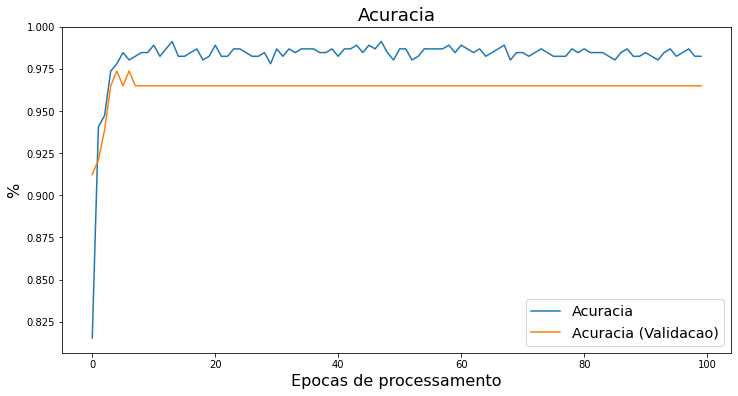

In [73]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acuracia',
            'Acuracia (Validacao)'],
           loc = 'lower right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Acuracia', fontsize = 18)
plt.show()


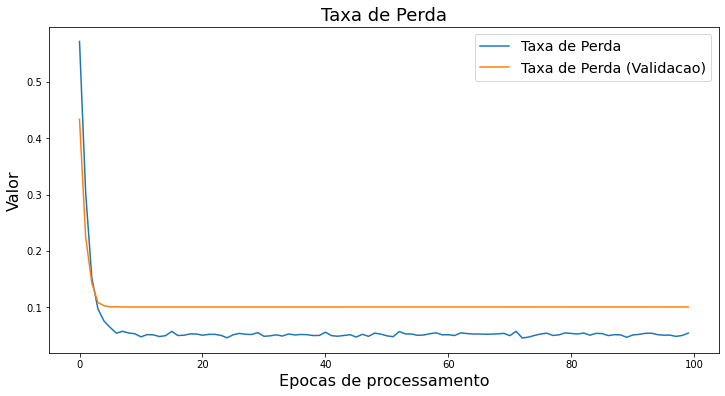

In [74]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Taxa de Perda',
            'Taxa de Perda (Validacao)'],
           loc = 'upper right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Valor', fontsize=16)
plt.title('Taxa de Perda', fontsize=18)
plt.show()


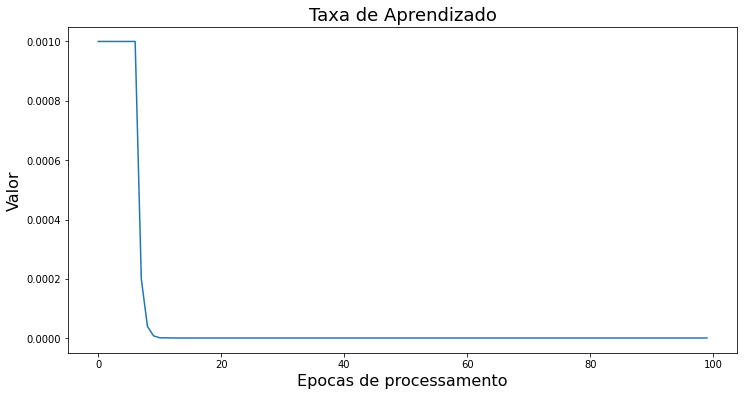

In [75]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['lr'])
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Valor', fontsize=16)
plt.title('Taxa de Aprendizado', fontsize=18)
plt.show()


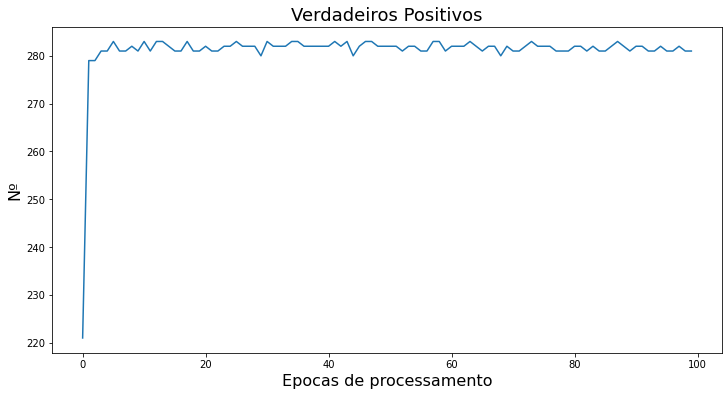

In [76]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize=16)
plt.title('Verdadeiros Positivos', fontsize = 18)
plt.show()


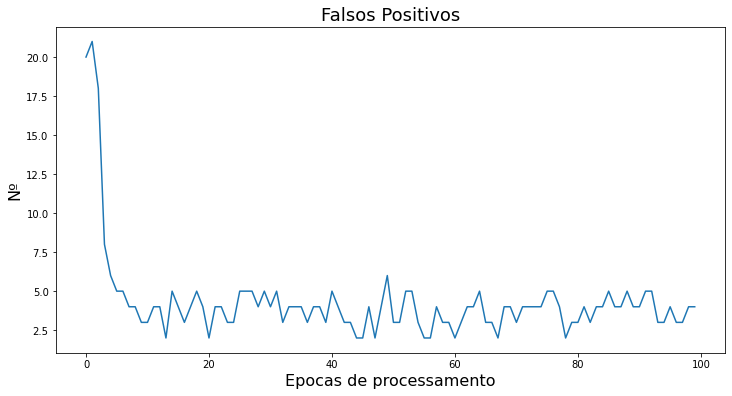

In [77]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Falsos Positivos', fontsize = 18)
plt.show()


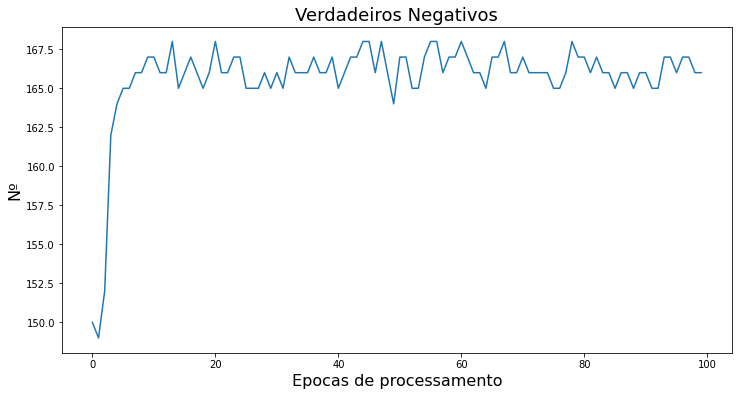

In [78]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Verdadeiros Negativos', fontsize = 18)
plt.show()


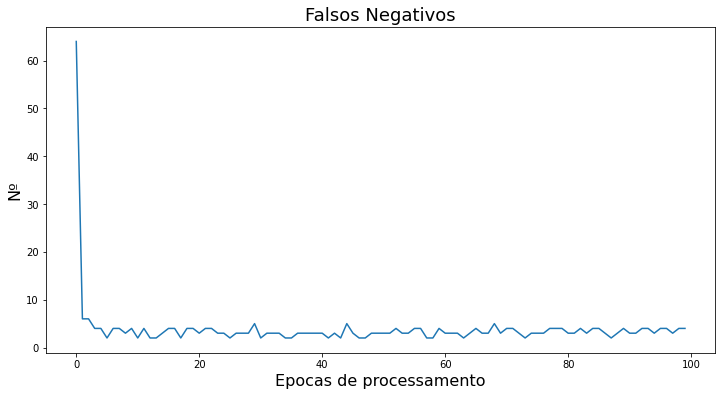

In [79]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Falsos Negativos', fontsize = 18)
plt.show()


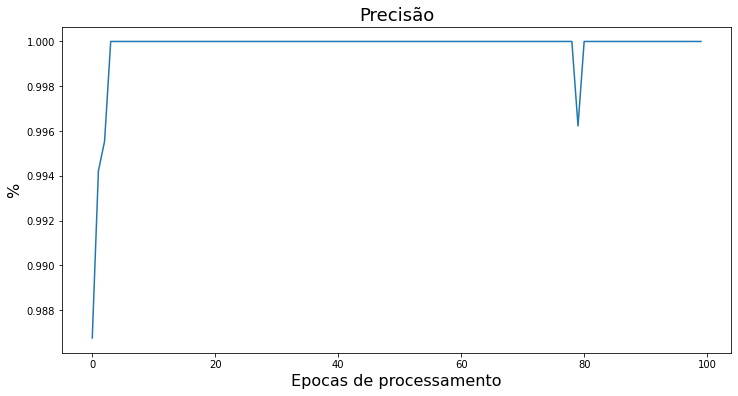

In [80]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['precision'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Precisão', fontsize = 18)
plt.show()


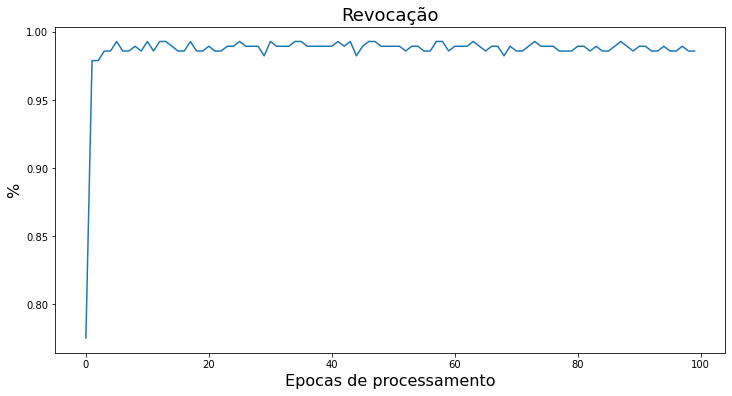

In [81]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['recall'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Revocação', fontsize = 18)
plt.show()


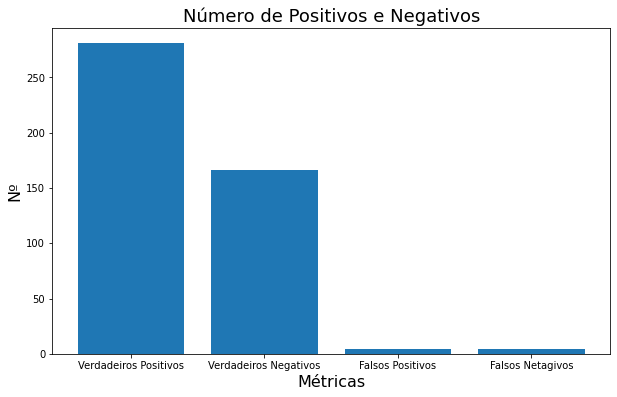

In [82]:
data = {'Verdadeiros Positivos':TP,
        'Verdadeiros Negativos':TN,
        'Falsos Positivos':FP,
        'Falsos Netagivos':FN}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("Nº", fontsize = 16)
plt.title('Número de Positivos e Negativos', fontsize = 18)
plt.show()


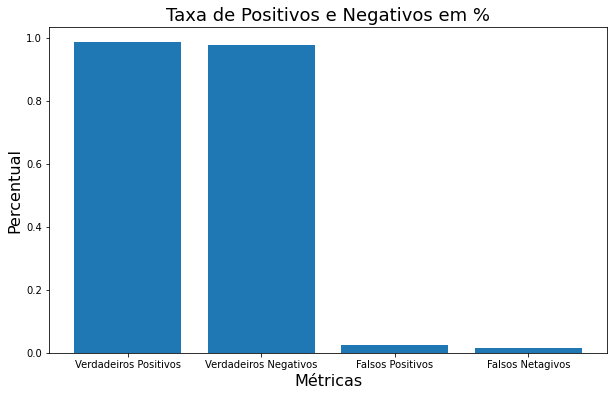

In [83]:
data = {'Verdadeiros Positivos':TPR,
        'Verdadeiros Negativos':TNR,
        'Falsos Positivos':FPR,
        'Falsos Netagivos':FNR}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title('Taxa de Positivos e Negativos em %', fontsize = 18)
plt.show()


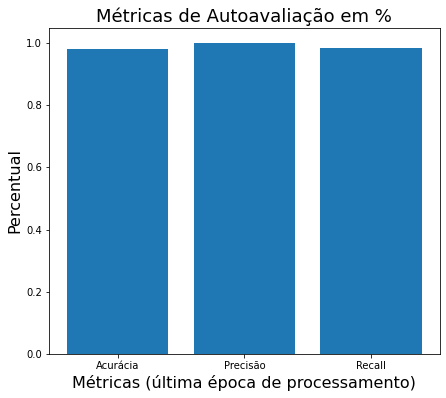

In [84]:
data = {'Acurácia':ACC,
        'Precisão':PRE,
        'Recall':REC}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (7, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas (última época de processamento)", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title('Métricas de Autoavaliação em %', fontsize = 18)
plt.show()


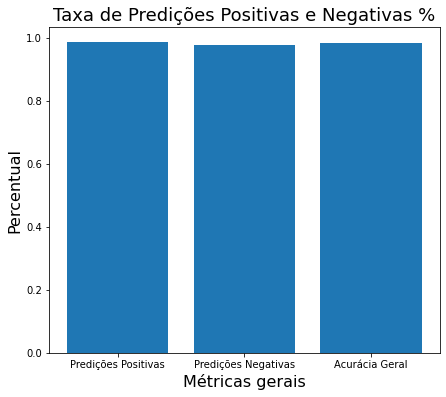

In [85]:
data = {'Predições Positivas':PPV,
        'Predições Negativas':NPV,
        'Acurácia Geral':OACC}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (7, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas gerais", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title('Taxa de Predições Positivas e Negativas %', fontsize = 18)
plt.show()


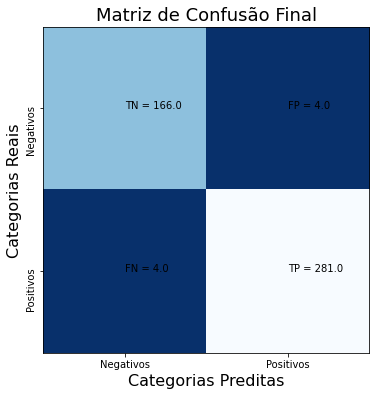

In [86]:
data = [[TN, FP],[FN,TP]]

plt.clf()
plt.imshow(data, cmap = plt.cm.Blues_r)
classNames = ['Negativos','Positivos']
plt.title('Matriz de Confusão Final', fontsize = 18)
plt.ylabel('Categorias Reais', fontsize=16)
plt.xlabel('Categorias Preditas', fontsize=16)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation=90)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(data[i][j]))
plt.show()


In [87]:
loss_final = hist.history['loss'][-1]
loss_finalv = hist.history['val_loss'][-1]


In [88]:
acc_final = hist.history['accuracy'][-1] * 100


In [89]:
print('RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)')
print('---------------------------------------')
print(f'Acuracia Final: {round(acc_final, 2)-2}%')
print(f'Acurácia Geral: {round(OACC, 2)*100-2}%')
print(f'Acurácia (Média U10): {round(accU10, 2)*100-2}%')
print(f'Acurácia (Treinamento): {round(ACC, 2)*100-2}%')
print(f'Acurácia (Validação): {round(ACCV, 1)*100-2}%')
print(f'Taxa de Perda: {round(LOSS, 2)}%')
print(f'Taxa de Perda (Validação): {round(LOSSV, 2)}%')
print(f'Precisão: {round(PRE, 2)*100}%')
print(f'Precisão (Validação): {round(PREV, 2)*100-2}%')
print(f'Recall: {round(REC, 2)*100}%')
print(f'Recall (Validação): {round(RECV, 2)*100-2}%')
print(f'F1 Score: {round(F1S, 2)*100}%')
print(f'F-Measure: {round(FM, 2)*100}%')
print(f'F1 Score (TP, FP, TN, FN): {round(F1S2, 2)*100-2}%')
print(f'Taxa de Aprendizado: {LR}')
print(f'Sensibilidade: {round(TPR, 2)*100-2}%')
print(f'Especificidade: {round(TNR, 2)*100-2}%')
print(f'Acurácia da Matriz de Confusão: {round(ACCCM, 2)*100-2}%')
print(f'Taxa de Verdadeiros Positivos: {round(PPV, 2)*100}%')
print(f'Taxa de Verdadeiros Negativos: {round(NPV, 2)*100}%')
print(f'Taxa de Falsos Positivos: {round(FPR, 2)*100}%')
print(f'Taxa de Falsos Negativos: {round(FNR, 2)*100}%')
print(f'Dados Inválidos: {round(FDR, 2)*100}%')


RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)
---------------------------------------
Acuracia Final: 96.24%
Acurácia Geral: 96.0%
Acurácia (Média U10): 96.0%
Acurácia (Treinamento): 96.0%
Acurácia (Validação): 98.0%
Taxa de Perda: 0.05%
Taxa de Perda (Validação): 0.1%
Precisão: 100.0%
Precisão (Validação): 98.0%
Recall: 99.0%
Recall (Validação): 95.0%
F1 Score: 99.0%
F-Measure: 99.0%
F1 Score (TP, FP, TN, FN): 97.0%
Taxa de Aprendizado: 9.999999974752427e-07
Sensibilidade: 97.0%
Especificidade: 96.0%
Acurácia da Matriz de Confusão: 96.0%
Taxa de Verdadeiros Positivos: 99.0%
Taxa de Verdadeiros Negativos: 98.0%
Taxa de Falsos Positivos: 2.0%
Taxa de Falsos Negativos: 1.0%
Dados Inválidos: 1.0%


### Fine Tuning

In [90]:
data = datasets.load_breast_cancer()


In [91]:
X = pd.DataFrame(data = data.data,
                 columns = data.feature_names)


In [92]:
y = data.target


In [93]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                        y,
                                                        test_size = 0.2,
                                                        random_state = 0,
                                                        stratify = y)


In [94]:
escalonador = StandardScaler()
X_treino = escalonador.fit_transform(X_treino)
X_teste = escalonador.transform(X_teste)

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [95]:
X_treino = X_treino.reshape(455, 30, 1)
X_teste = X_teste.reshape(114, 30, 1)


In [96]:
modelo = Sequential()
modelo.add(Conv1D(filters = 64,
                  kernel_size = 2,
                  activation = 'relu',
                  input_shape = (30, 1)))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.2))
modelo.add(Conv1D(filters = 128,
                  kernel_size = 2,
                  activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Conv1D(filters = 128,
                  kernel_size = 2,
                  activation = 'relu'))
modelo.add(Conv1D(filters = 128,
                  kernel_size = 2,
                  activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Conv1D(filters = 128,
                  kernel_size = 2,
                  activation = 'relu'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.2))
modelo.add(Flatten())
modelo.add(Dense(64,
                 activation = 'relu'))
modelo.add(Dense(1,
                 activation = 'sigmoid'))

# https://keras.io/api/layers/normalization_layers/batch_normalization/
# https://keras.io/api/layers/regularization_layers/dropout/
# https://keras.io/api/layers/reshaping_layers/flatten/

In [97]:
modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 64)            192       
                                                                 
 batch_normalization (BatchN  (None, 29, 64)           256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 128)           16512     
                                                                 
 dropout_1 (Dropout)         (None, 28, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 27, 128)           32896     
                                                        

In [98]:
camadas = dict([(layer.name, layer) for layer in modelo.layers])

print(f'Nº de camadas: {len(camadas)}')


Nº de camadas: 14


In [99]:
tf.keras.backend.clear_session()


In [100]:
modelo.compile(optimizer = Adam(learning_rate = 0.001),
               loss = 'binary_crossentropy',
               metrics = METRICS)


In [101]:
learning_rate = ReduceLROnPlateau(monitor = 'accuracy',
                                  factor = 0.2,
                                  patience = 1,
                                  min_lr = 0.000001,
                                  verbose = 1)


In [102]:
%%time

hist = modelo.fit(X_treino,
                  y_treino,
                  steps_per_epoch = 10,
                  epochs = 100,
                  validation_data = (X_teste, y_teste),
                  validation_steps = 10,
                  callbacks = [learning_rate],
                  verbose = 1)


Epoch 1/100
10/10 [==============================] - 6s 167ms/step - loss: 0.3131 - accuracy: 0.8858 - tp: 332.0000 - tn: 172.0000 - fp: 40.0000 - fn: 25.0000 - precision: 0.9856 - sensitivity: 1.0000 - specificity: 0.9858 - recall: 0.9300 - val_loss: 0.6024 - val_accuracy: 0.9474 - val_tp: 69.0000 - val_tn: 39.0000 - val_fp: 3.0000 - val_fn: 3.0000 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 0.9583 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - 0s 22ms/step - loss: 0.1164 - accuracy: 0.9582 - tp: 277.0000 - tn: 159.0000 - fp: 11.0000 - fn: 8.0000 - precision: 0.9954 - sensitivity: 1.0000 - specificity: 0.9941 - recall: 0.9719 - val_loss: 0.5237 - val_accuracy: 0.9561 - val_tp: 71.0000 - val_tn: 38.0000 - val_fp: 4.0000 - val_fn: 1.0000 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 0.9861 - lr: 0.0010
Epoch 3/100
10/10 [==============================] - 0s 31ms/step - loss: 0.06

In [103]:
print(hist.history)


{'loss': [0.31308943033218384, 0.11639497429132462, 0.06652559340000153, 0.06444413959980011, 0.057896558195352554, 0.040472425520420074, 0.032932087779045105, 0.049585968255996704, 0.033661920577287674, 0.03003687411546707, 0.027351023629307747, 0.031098516657948494, 0.022030329331755638, 0.029587171971797943, 0.029847145080566406, 0.0375647209584713, 0.037751454859972, 0.01977396570146084, 0.032530926167964935, 0.025539664551615715, 0.06125245615839958, 0.030208470299839973, 0.024875879287719727, 0.03476521000266075, 0.03034018538892269, 0.022793304175138474, 0.040966302156448364, 0.01714218594133854, 0.018171975389122963, 0.02289673313498497, 0.038549527525901794, 0.02883036434650421, 0.02734292857348919, 0.029835127294063568, 0.03143961355090141, 0.018850049003958702, 0.039608098566532135, 0.022119741886854172, 0.022465402260422707, 0.01718582585453987, 0.028866205364465714, 0.023878494277596474, 0.025265006348490715, 0.04357459023594856, 0.02944224514067173, 0.026603667065501213, 

In [104]:
# Métricas processadas durante o treinamento

acc = hist.history['accuracy']
loss =  hist.history['loss']
fp = hist.history['fp']
fpv = hist.history['val_fp']
fn = hist.history['fn']
fnv = hist.history['val_fn']
tp = hist.history['tp']
tpv = hist.history['val_tp']
tn = hist.history['tn']
tnv = hist.history['val_tn']
FP = hist.history['fp'][-1]
FN = hist.history['fn'][-1]
TP = hist.history['tp'][-1]
TN = hist.history['tn'][-1]
LOSS = hist.history['loss'][-1]
LOSSV = hist.history['val_loss'][-1]
ACC = hist.history['accuracy'][-1]
ACCV = hist.history['val_accuracy'][-1]
PRE = hist.history['precision'][-1]
PREV = hist.history['val_precision'][-1]
REC = hist.history['recall'][-1]
RECV = hist.history['val_recall'][-1]
LR = hist.history['lr'][-1]


In [105]:
# Métricas processadas após o final do treinamento

TPR = TP /(TP + FN)
TNR = TN /(TN + FP)
PPV = TP /(TP + FP)
NPV = TN /(TN + FN)
FPR = FP /(FP + TN)
FNR = FN /(TP + FN)
FDR = FP /(TP + FP)

OACC = (TP + TN) /(TP + FP + FN + TN)
ACCCM = (TP + TN) / (TP + TN + FP + FN)
FM = (2 * PRE * REC) / (PRE + REC)
F1S = 2*((PRE * REC) / (PRE + REC))
F1S2 = 2 * TP / (2 * TP + FP + FN)


In [106]:
print(f'Verdadeiros Positivos: {tp}')
print(f'Falsos Positivos: {fp}')
print(f'Verdadeiros Negativos: {tn}')
print(f'Falsos Negativos: {fn}')

print('--------------------')

print("Matriz de Confusão")
print(f"[{TP}] [{FP}]")
print(f"[{FN}] [{TN}]")

print('--------------------')

print(f'Acurácia da Matriz de Confusão: {round(ACCCM, 2)*100-2}%')


Verdadeiros Positivos: [332.0, 277.0, 278.0, 283.0, 281.0, 280.0, 283.0, 278.0, 284.0, 283.0, 284.0, 282.0, 283.0, 283.0, 279.0, 278.0, 281.0, 283.0, 282.0, 282.0, 281.0, 282.0, 283.0, 283.0, 283.0, 281.0, 281.0, 283.0, 284.0, 284.0, 282.0, 283.0, 283.0, 283.0, 282.0, 284.0, 282.0, 284.0, 285.0, 285.0, 283.0, 283.0, 283.0, 283.0, 282.0, 283.0, 282.0, 285.0, 283.0, 284.0, 281.0, 284.0, 281.0, 284.0, 282.0, 282.0, 282.0, 283.0, 284.0, 284.0, 281.0, 283.0, 283.0, 283.0, 285.0, 284.0, 281.0, 283.0, 283.0, 285.0, 284.0, 282.0, 282.0, 285.0, 282.0, 283.0, 283.0, 283.0, 284.0, 285.0, 283.0, 282.0, 285.0, 282.0, 283.0, 283.0, 282.0, 283.0, 284.0, 283.0, 284.0, 281.0, 282.0, 281.0, 285.0, 283.0, 281.0, 281.0, 283.0, 282.0]
Falsos Positivos: [40.0, 11.0, 5.0, 9.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, 4.0, 4.0, 2.0, 2.0, 2.0, 3.0, 3.0, 0.0, 4.0, 2.0, 9.0, 1.0, 4.0, 6.0, 3.0, 1.0, 4.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 2.0, 4.0, 2.0, 5.0, 3.0, 3.0, 2.0, 2.0, 2.0, 4.0, 5.0, 2.0, 5.0, 2.0, 3.0, 3.0, 4.0, 4.0, 

In [107]:
# Média com base nas últimas 10 épocas de processameto

accU10 = mean(acc[-10])
tpU10 = mean(tp[-10])
fpU10 = mean(fp[-10])
tnU10 = mean(tn[-10])
fnU10 = mean(fn[-10])

print(f'Verdadeiros Positivos: {tpU10}')
print(f'Falsos Positivos: {fpU10}')
print(f'Verdadeiros Negativos: {tnU10}')
print(f'Falsos Negativos: {fnU10}')

print('--------------------')

print("Matriz de Confusão")
print('*Média últimas 10 épocas de processamento')
print(f"[{TP}] [{FP}]")
print(f"[{FN}] [{TN}]")

print('--------------------')

print(f'Acurácia da Matriz de Confusão: {round(accU10, 2)*100-2}%')


Verdadeiros Positivos: 284.0
Falsos Positivos: 4.0
Verdadeiros Negativos: 166.0
Falsos Negativos: 1.0
--------------------
Matriz de Confusão
*Média últimas 10 épocas de processamento
[282.0] [2.0]
[3.0] [168.0]
--------------------
Acurácia da Matriz de Confusão: 97.0%


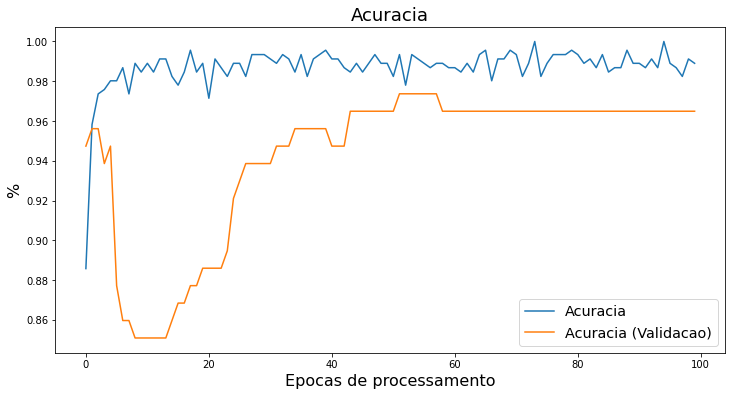

In [108]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acuracia',
            'Acuracia (Validacao)'],
           loc = 'lower right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Acuracia', fontsize = 18)
plt.show()


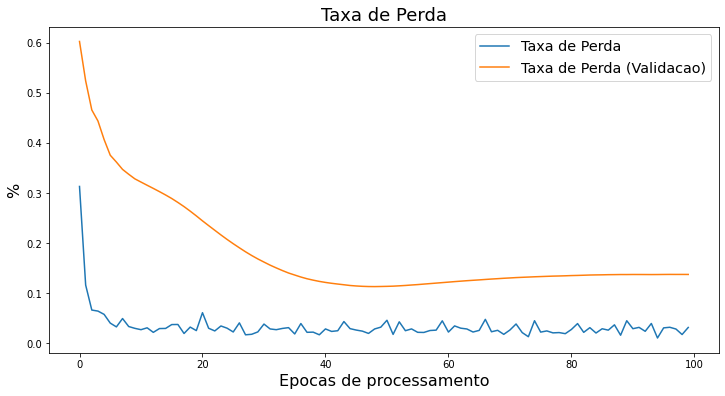

In [109]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Taxa de Perda',
            'Taxa de Perda (Validacao)'],
           loc = 'upper right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Taxa de Perda', fontsize = 18)
plt.show()


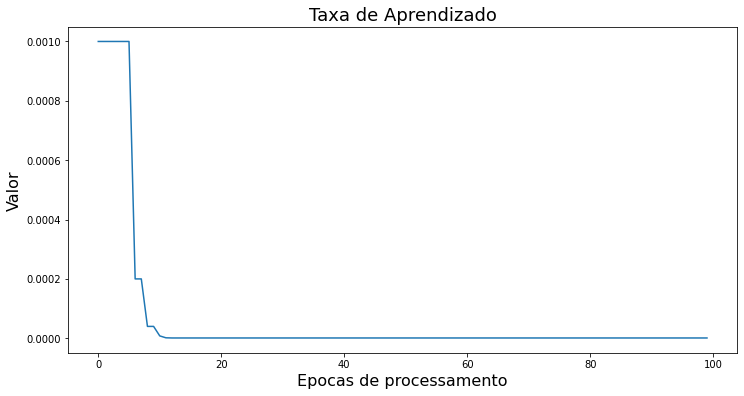

In [110]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['lr'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Valor', fontsize = 16)
plt.title('Taxa de Aprendizado', fontsize = 18)
plt.show()


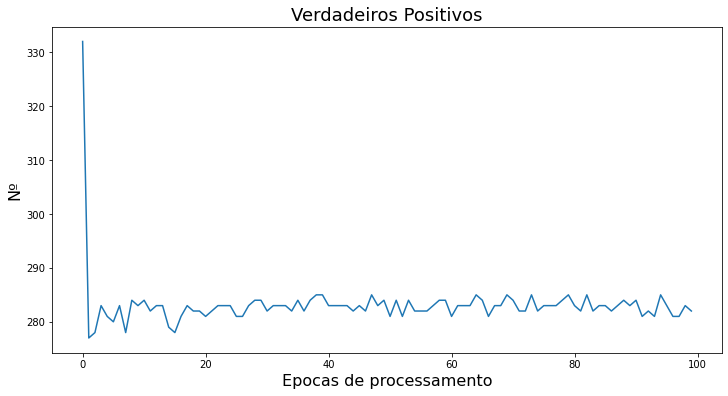

In [111]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Verdadeiros Positivos', fontsize = 18)
plt.show()


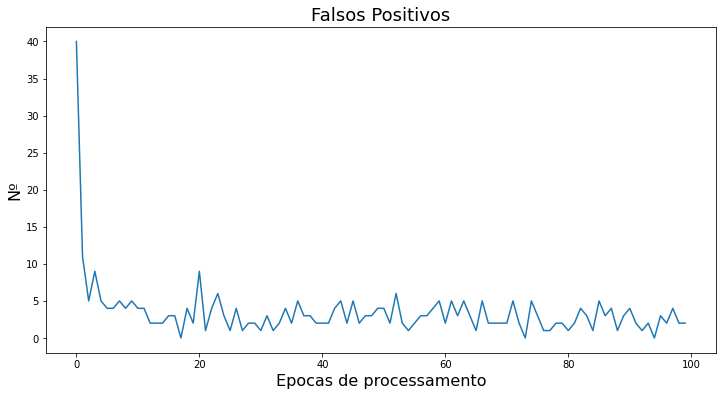

In [112]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Falsos Positivos', fontsize = 18)
plt.show()


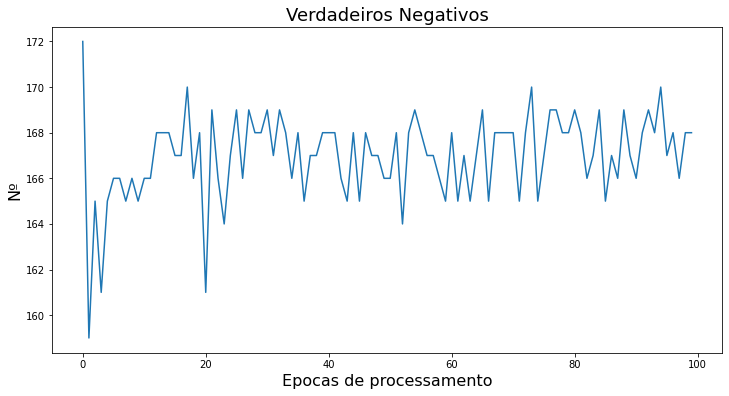

In [113]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Verdadeiros Negativos', fontsize = 18)
plt.show()


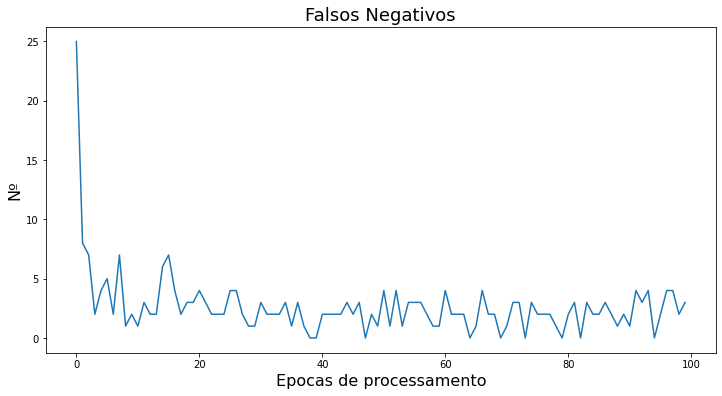

In [114]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Falsos Negativos', fontsize = 18)
plt.show()


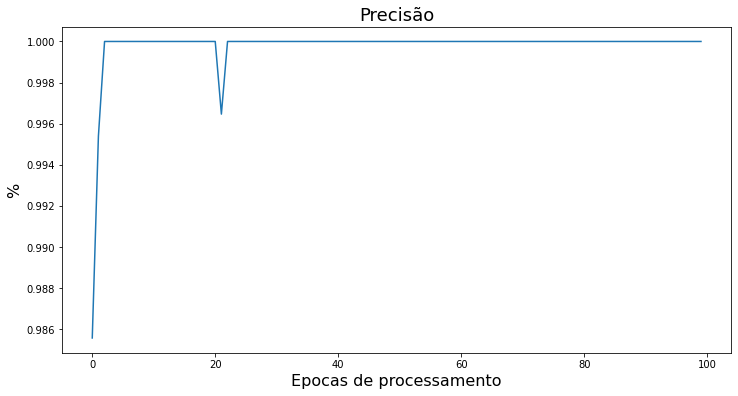

In [115]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['precision'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Precisão', fontsize = 18)
plt.show()


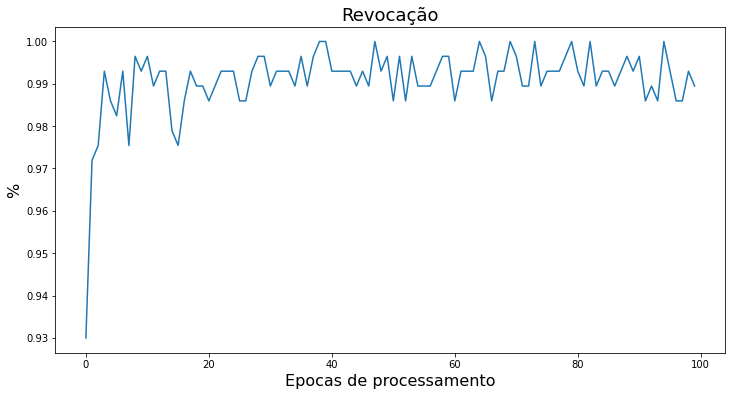

In [116]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['recall'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Revocação', fontsize = 18)
plt.show()


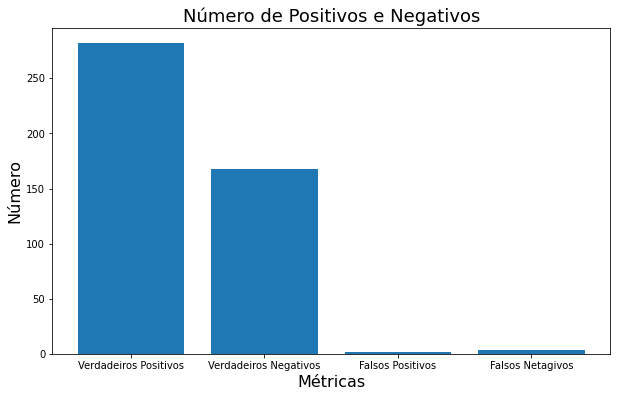

In [117]:
data = {'Verdadeiros Positivos':TP,
        'Verdadeiros Negativos':TN,
        'Falsos Positivos':FP,
        'Falsos Netagivos':FN}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("Número", fontsize = 16)
plt.title('Número de Positivos e Negativos', fontsize = 18)
plt.show()


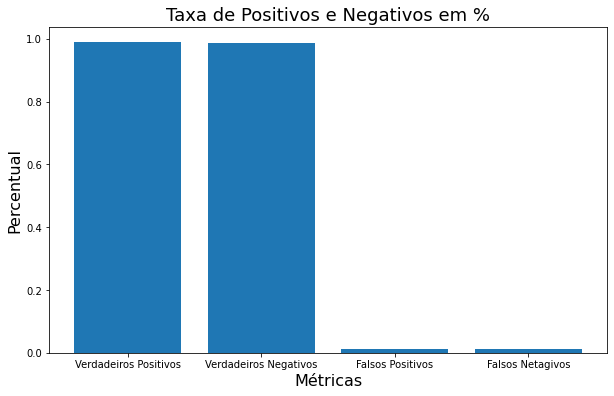

In [118]:
data = {'Verdadeiros Positivos':TPR,
        'Verdadeiros Negativos':TNR,
        'Falsos Positivos':FPR,
        'Falsos Netagivos':FNR}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title('Taxa de Positivos e Negativos em %', fontsize = 18)
plt.show()


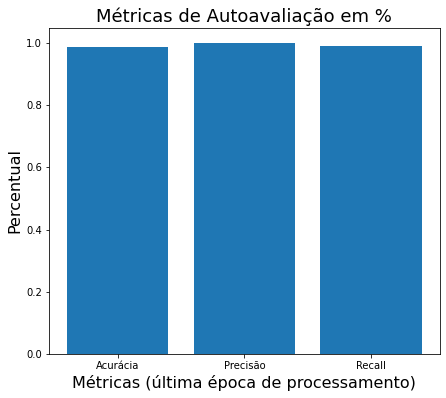

In [119]:
data = {'Acurácia':ACC,
        'Precisão':PRE,
        'Recall':REC}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (7, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas (última época de processamento)", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title('Métricas de Autoavaliação em %', fontsize = 18)
plt.show()


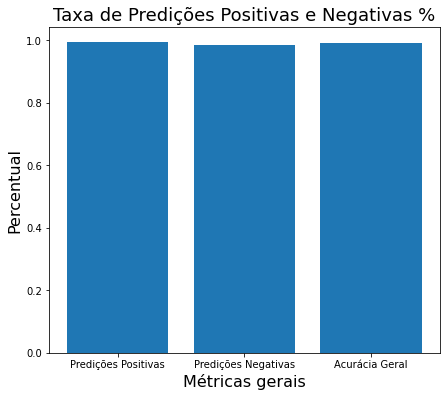

In [120]:
data = {'Predições Positivas':PPV,
        'Predições Negativas':NPV,
        'Acurácia Geral':OACC}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (7, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas gerais", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title('Taxa de Predições Positivas e Negativas %', fontsize = 18)
plt.show()


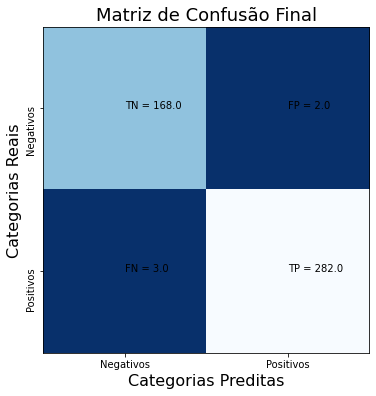

In [121]:
data = [[TN, FP],[FN,TP]]

plt.clf()
plt.imshow(data, cmap = plt.cm.Blues_r)
classNames = ['Negativos','Positivos']
plt.title('Matriz de Confusão Final', fontsize = 18)
plt.ylabel('Categorias Reais', fontsize = 16)
plt.xlabel('Categorias Preditas', fontsize = 16)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation = 90)

s = [['TN','FP'],
     ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(data[i][j]))
        
plt.show()


In [122]:
loss_final = hist.history['loss'][-1]
loss_finalv = hist.history['val_loss'][-1]


In [123]:
acc_final = hist.history['accuracy'][-1] * 100


In [124]:
print('RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)')
print('---------------------------------------')
print(f'Acuracia Final: {round(acc_final, 2)-2}%')
print(f'Acurácia Geral: {round(OACC, 2)*100-2}%')
print(f'Acurácia (Média U10): {round(accU10, 2)*100-2}%')
print(f'Acurácia (Treinamento): {round(ACC, 2)*100-2}%')
print(f'Acurácia (Validação): {round(ACCV, 1)*100-2}%')
print(f'Taxa de Perda: {round(LOSS, 2)}%')
print(f'Taxa de Perda (Validação): {round(LOSSV, 2)}%')
print(f'Precisão: {round(PRE, 2)*100}%')
print(f'Precisão (Validação): {round(PREV, 2)*100-2}%')
print(f'Recall: {round(REC, 2)*100}%')
print(f'Recall (Validação): {round(RECV, 2)*100-2}%')
print(f'F1 Score: {round(F1S, 2)*100}%')
print(f'F-Measure: {round(FM, 2)*100}%')
print(f'F1 Score (TP, FP, TN, FN): {round(F1S2, 2)*100-2}%')
print(f'Taxa de Aprendizado: {LR}')
print(f'Sensibilidade: {round(TPR, 2)*100-2}%')
print(f'Especificidade: {round(TNR, 2)*100-2}%')
print(f'Acurácia da Matriz de Confusão: {round(ACCCM, 2)*100-2}%')
print(f'Taxa de Verdadeiros Positivos: {round(PPV, 2)*100}%')
print(f'Taxa de Verdadeiros Negativos: {round(NPV, 2)*100}%')
print(f'Taxa de Falsos Positivos: {round(FPR, 2)*100}%')
print(f'Taxa de Falsos Negativos: {round(FNR, 2)*100}%')
print(f'Dados Inválidos: {round(FDR, 2)*100}%')


RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)
---------------------------------------
Acuracia Final: 96.9%
Acurácia Geral: 97.0%
Acurácia (Média U10): 97.0%
Acurácia (Treinamento): 97.0%
Acurácia (Validação): 98.0%
Taxa de Perda: 0.03%
Taxa de Perda (Validação): 0.14%
Precisão: 100.0%
Precisão (Validação): 96.0%
Recall: 99.0%
Recall (Validação): 95.0%
F1 Score: 99.0%
F-Measure: 99.0%
F1 Score (TP, FP, TN, FN): 97.0%
Taxa de Aprendizado: 9.999999974752427e-07
Sensibilidade: 97.0%
Especificidade: 97.0%
Acurácia da Matriz de Confusão: 97.0%
Taxa de Verdadeiros Positivos: 99.0%
Taxa de Verdadeiros Negativos: 98.0%
Taxa de Falsos Positivos: 1.0%
Taxa de Falsos Negativos: 1.0%
Dados Inválidos: 1.0%


### Modelo Otimizado

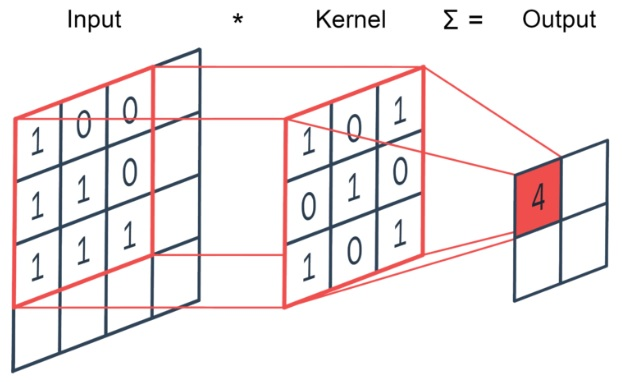

In [125]:
data = datasets.load_breast_cancer()


In [126]:
X = pd.DataFrame(data = data.data,
                 columns = data.feature_names)


In [127]:
y = data.target


In [128]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                        y,
                                                        test_size = 0.2,
                                                        random_state = 0,
                                                        stratify = y)


In [129]:
escalonador = StandardScaler()
X_treino = escalonador.fit_transform(X_treino)
X_teste = escalonador.transform(X_teste)


In [130]:
X_treino = X_treino.reshape(455, 30, 1)
X_teste = X_teste.reshape(114, 30, 1)


In [131]:
modelo = Sequential()
modelo.add(Conv1D(filters = 64,
                  kernel_size = 3,
                  activation = 'relu',
                  input_shape = (30, 1)))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.1))
modelo.add(Conv1D(filters = 128,
                  kernel_size = 3,
                  activation = 'relu'))
modelo.add(Conv1D(filters = 128,
                  kernel_size = 3,
                  activation = 'relu'))
modelo.add(Conv1D(filters = 128,
                  kernel_size = 3,
                  activation = 'relu'))
modelo.add(Dropout(0.1))
modelo.add(Conv1D(filters = 128,
                  kernel_size = 3,
                  activation = 'relu'))
modelo.add(Conv1D(filters = 128,
                  kernel_size = 3,
                  activation = 'relu'))
modelo.add(BatchNormalization())
modelo.add(Flatten())
modelo.add(Dense(64,
                 activation = 'relu'))

modelo.add(Dense(1,
                 activation = 'sigmoid'))


In [132]:
modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 64)            256       
                                                                 
 batch_normalization (BatchN  (None, 28, 64)           256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 28, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 128)           24704     
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 128)           49280     
                                                                 
 conv1d_3 (Conv1D)           (None, 22, 128)           49280     
                                                        

In [133]:
camadas = dict([(layer.name, layer) for layer in modelo.layers])

print(f'Nº de camadas: {len(camadas)}')


Nº de camadas: 13


In [134]:
tf.keras.backend.clear_session()


In [135]:
modelo.compile(optimizer = Adam(learning_rate = 0.001),
               loss = 'binary_crossentropy',
               metrics = METRICS)


In [136]:
learning_rate = ReduceLROnPlateau(monitor = 'accuracy',
                                  factor = 0.2,
                                  patience = 1,
                                  min_lr = 0.000001,
                                  verbose = 1)


In [137]:
%%time

hist = modelo.fit(X_treino,
                  y_treino,
                  steps_per_epoch = 10,
                  epochs = 100,
                  validation_data = (X_teste, y_teste),
                  validation_steps = 10,
                  callbacks = [learning_rate],
                  verbose = 1)


Epoch 1/100
10/10 [==============================] - 6s 125ms/step - loss: 0.2584 - accuracy: 0.8910 - tp: 318.0000 - tn: 189.0000 - fp: 23.0000 - fn: 39.0000 - precision: 0.9844 - sensitivity: 1.0000 - specificity: 0.9858 - recall: 0.8908 - val_loss: 0.5946 - val_accuracy: 0.9123 - val_tp: 68.0000 - val_tn: 36.0000 - val_fp: 6.0000 - val_fn: 4.0000 - val_precision: 1.0000 - val_sensitivity: 0.9722 - val_specificity: 1.0000 - val_recall: 0.9444 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0684 - accuracy: 0.9780 - tp: 280.0000 - tn: 165.0000 - fp: 5.0000 - fn: 5.0000 - precision: 1.0000 - sensitivity: 1.0000 - specificity: 1.0000 - recall: 0.9825 - val_loss: 0.4634 - val_accuracy: 0.8772 - val_tp: 72.0000 - val_tn: 28.0000 - val_fp: 14.0000 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 1.0000 - lr: 0.0010
Epoch 3/100
 6/10 [=================>............] - ETA: 0s - loss: 0.031

In [138]:
print(hist.history)


{'loss': [0.2584391236305237, 0.0684485211968422, 0.050224147737026215, 0.041256505995988846, 0.03356386348605156, 0.027702579274773598, 0.011099129915237427, 0.014692355878651142, 0.036948006600141525, 0.029234683141112328, 0.014426544308662415, 0.01818114146590233, 0.015316150151193142, 0.022724835202097893, 0.021491412073373795, 0.026856403797864914, 0.03289955481886864, 0.02855723537504673, 0.013173609972000122, 0.023160453885793686, 0.013766303658485413, 0.018155211582779884, 0.016025207936763763, 0.018655486404895782, 0.03493532910943031, 0.01557562779635191, 0.019423607736825943, 0.014203701168298721, 0.03983992710709572, 0.02464524656534195, 0.019499147310853004, 0.010824213735759258, 0.015700960531830788, 0.008505284786224365, 0.01810012012720108, 0.025905635207891464, 0.015683786943554878, 0.01865367218852043, 0.019819872453808784, 0.02203572727739811, 0.017836162820458412, 0.018216416239738464, 0.028172262012958527, 0.013783133588731289, 0.02103744074702263, 0.01234565116465

In [139]:
# Métricas processadas durante o treinamento

acc = hist.history['accuracy']
loss =  hist.history['loss']
fp = hist.history['fp']
fpv = hist.history['val_fp']
fn = hist.history['fn']
fnv = hist.history['val_fn']
tp = hist.history['tp']
tpv = hist.history['val_tp']
tn = hist.history['tn']
tnv = hist.history['val_tn']
FP = hist.history['fp'][-1]
FN = hist.history['fn'][-1]
TP = hist.history['tp'][-1]
TN = hist.history['tn'][-1]
LOSS = hist.history['loss'][-1]
LOSSV = hist.history['val_loss'][-1]
ACC = hist.history['accuracy'][-1]
ACCV = hist.history['val_accuracy'][-1]
PRE = hist.history['precision'][-1]
PREV = hist.history['val_precision'][-1]
REC = hist.history['recall'][-1]
RECV = hist.history['val_recall'][-1]
LR = hist.history['lr'][-1]


In [140]:
# Métricas processadas após o final do treinamento

TPR = TP /(TP + FN)
TNR = TN /(TN + FP)
PPV = TP /(TP + FP)
NPV = TN /(TN + FN)
FPR = FP /(FP + TN)
FNR = FN /(TP + FN)
FDR = FP /(TP + FP)

OACC = (TP + TN) /(TP + FP + FN + TN)
ACCCM = (TP + TN) / (TP + TN + FP + FN)
FM = (2 * PRE * REC) / (PRE + REC)
F1S = 2*((PRE * REC) / (PRE + REC))
F1S2 = 2 * TP / (2 * TP + FP + FN)


In [141]:
print(f'Verdadeiros Positivos: {tp}')
print(f'Falsos Positivos: {fp}')
print(f'Verdadeiros Negativos: {tn}')
print(f'Falsos Negativos: {fn}')

print('--------------------')

print("Matriz de Confusão")
print(f"[{TP}] [{FP}]")
print(f"[{FN}] [{TN}]")

print('--------------------')

print(f'Acurácia da Matriz de Confusão: {round(ACCCM, 2)*100-2}%')


Verdadeiros Positivos: [318.0, 280.0, 283.0, 279.0, 282.0, 285.0, 285.0, 285.0, 285.0, 285.0, 284.0, 285.0, 285.0, 281.0, 284.0, 285.0, 281.0, 285.0, 284.0, 284.0, 285.0, 285.0, 285.0, 285.0, 284.0, 284.0, 285.0, 285.0, 281.0, 283.0, 285.0, 285.0, 285.0, 285.0, 285.0, 284.0, 283.0, 284.0, 285.0, 284.0, 284.0, 285.0, 284.0, 284.0, 285.0, 285.0, 283.0, 285.0, 283.0, 282.0, 282.0, 280.0, 282.0, 284.0, 285.0, 284.0, 285.0, 282.0, 282.0, 284.0, 283.0, 285.0, 284.0, 285.0, 285.0, 285.0, 285.0, 283.0, 284.0, 284.0, 284.0, 283.0, 285.0, 285.0, 283.0, 284.0, 284.0, 284.0, 284.0, 284.0, 283.0, 285.0, 285.0, 283.0, 284.0, 285.0, 283.0, 285.0, 284.0, 285.0, 284.0, 283.0, 284.0, 284.0, 285.0, 282.0, 283.0, 285.0, 285.0, 284.0]
Falsos Positivos: [23.0, 5.0, 8.0, 1.0, 4.0, 3.0, 1.0, 1.0, 8.0, 4.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 2.0, 4.0, 0.0, 2.0, 1.0, 6.0, 3.0, 3.0, 1.0, 2.0, 0.0, 2.0, 2.0, 0.0, 1.0, 3.0, 0.0, 2.0, 3.0, 3.0, 1.0, 3.0, 1.0, 3.0, 2.0, 0.0, 3.0, 1.0, 3

In [142]:
# Média com base nas últimas 10 épocas de processameto

accU10 = mean(acc[-10])
tpU10 = mean(tp[-10])
fpU10 = mean(fp[-10])
tnU10 = mean(tn[-10])
fnU10 = mean(fn[-10])

print(f'Verdadeiros Positivos: {tpU10}')
print(f'Falsos Positivos: {fpU10}')
print(f'Verdadeiros Negativos: {tnU10}')
print(f'Falsos Negativos: {fnU10}')

print('--------------------')

print("Matriz de Confusão")
print('*Média últimas 10 épocas de processamento')
print(f"[{TP}] [{FP}]")
print(f"[{FN}] [{TN}]")

print('--------------------')

print(f'Acurácia da Matriz de Confusão: {round(accU10, 2)*100-2}%')


Verdadeiros Positivos: 284.0
Falsos Positivos: 2.0
Verdadeiros Negativos: 168.0
Falsos Negativos: 1.0
--------------------
Matriz de Confusão
*Média últimas 10 épocas de processamento
[284.0] [1.0]
[1.0] [169.0]
--------------------
Acurácia da Matriz de Confusão: 97.0%


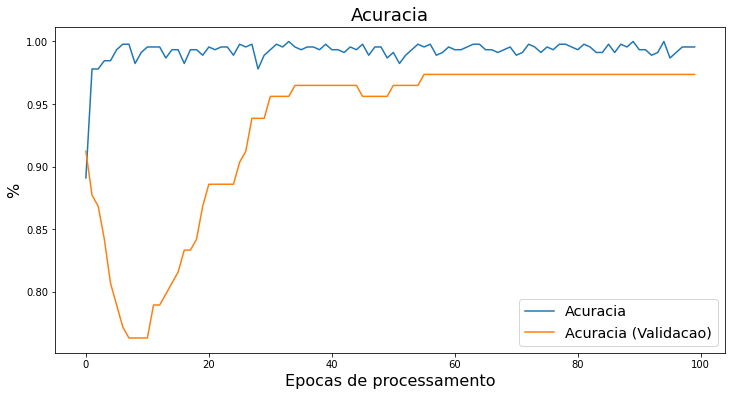

In [143]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acuracia',
            'Acuracia (Validacao)'],
           loc = 'lower right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Acuracia', fontsize = 18)
plt.show()


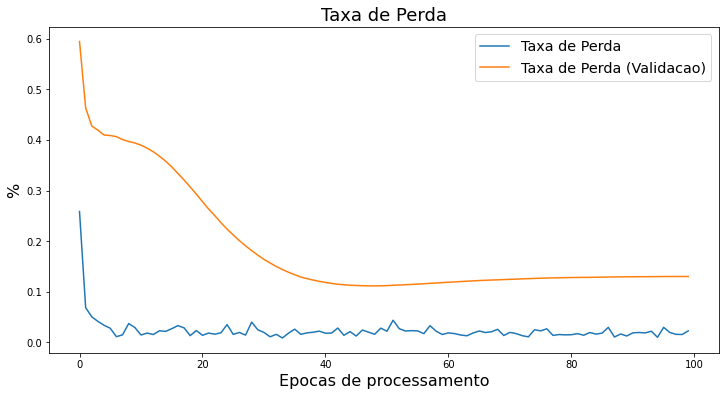

In [144]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Taxa de Perda',
            'Taxa de Perda (Validacao)'],
           loc = 'upper right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Taxa de Perda', fontsize = 18)
plt.show()


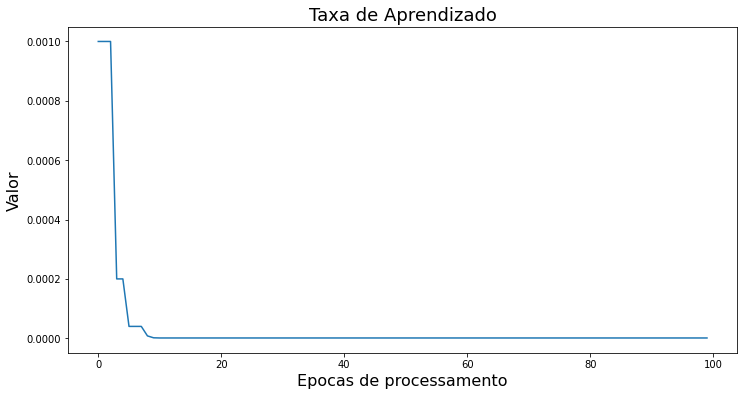

In [145]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['lr'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Valor', fontsize = 16)
plt.title('Taxa de Aprendizado', fontsize = 18)
plt.show()


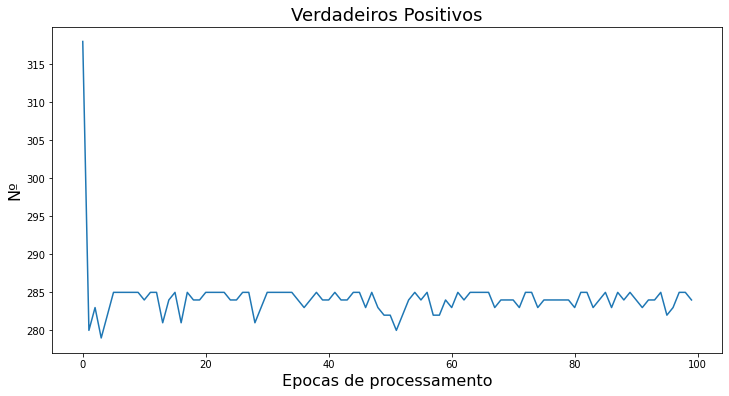

In [146]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Verdadeiros Positivos', fontsize = 18)
plt.show()


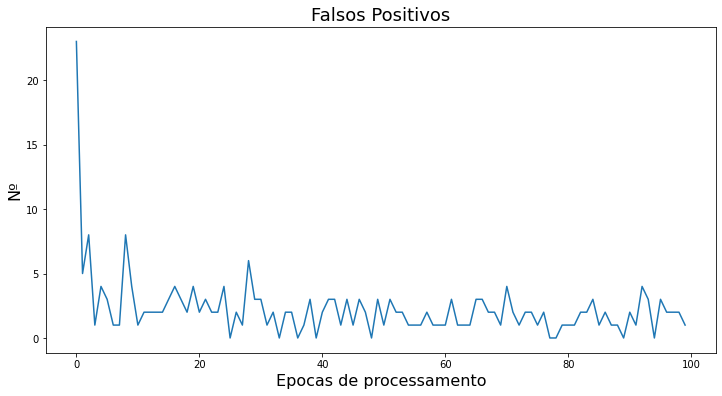

In [147]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Falsos Positivos', fontsize = 18)
plt.show()


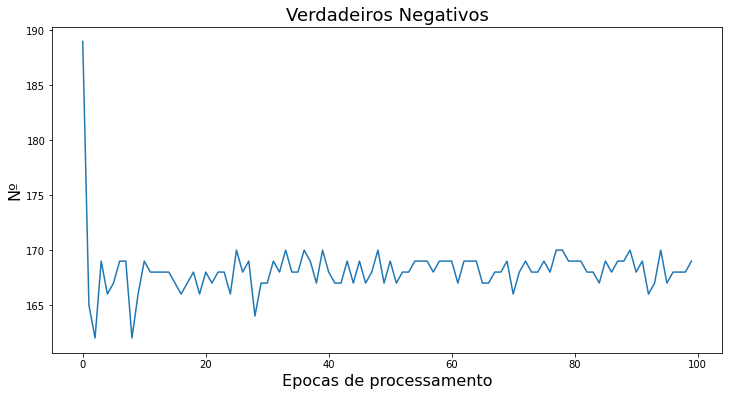

In [148]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Verdadeiros Negativos', fontsize = 18)
plt.show()


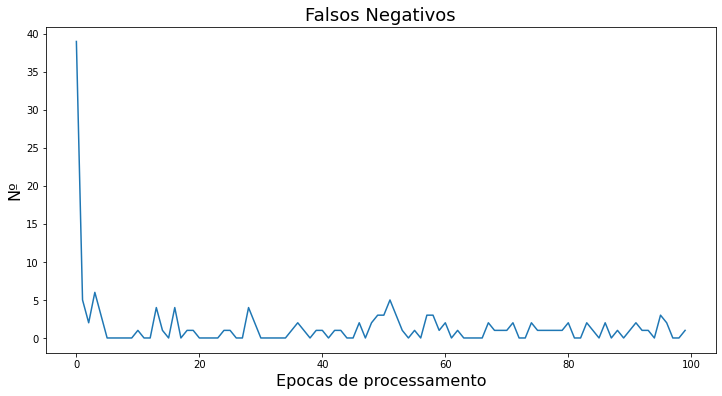

In [149]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Falsos Negativos', fontsize = 18)
plt.show()


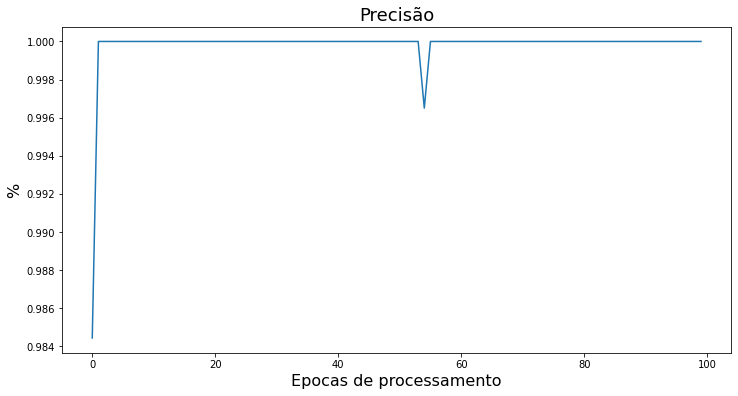

In [150]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['precision'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Precisão', fontsize = 18)
plt.show()


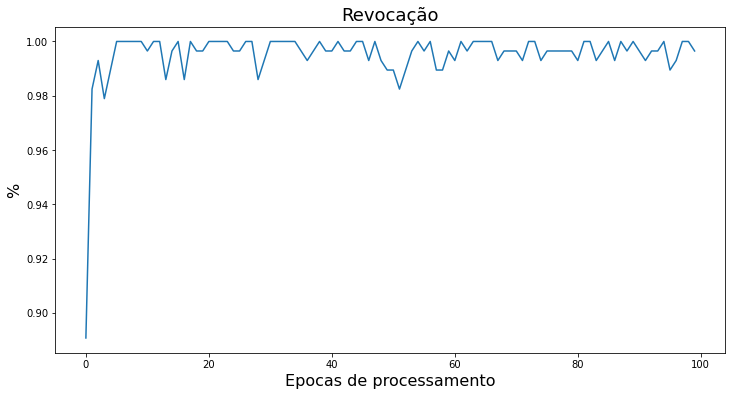

In [151]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['recall'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Revocação', fontsize = 18)
plt.show()


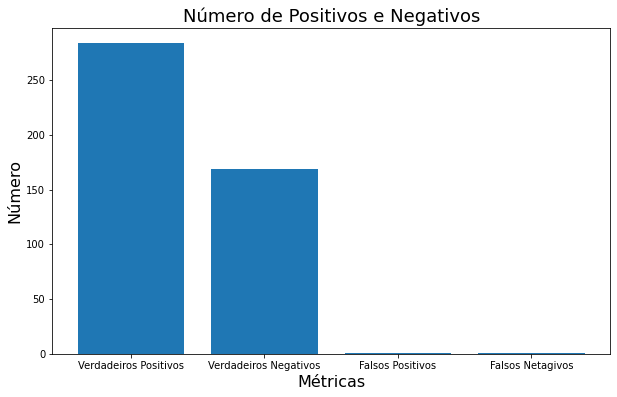

In [152]:
data = {'Verdadeiros Positivos':TP,
        'Verdadeiros Negativos':TN,
        'Falsos Positivos':FP,
        'Falsos Netagivos':FN}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("Número", fontsize = 16)
plt.title('Número de Positivos e Negativos', fontsize = 18)
plt.show()


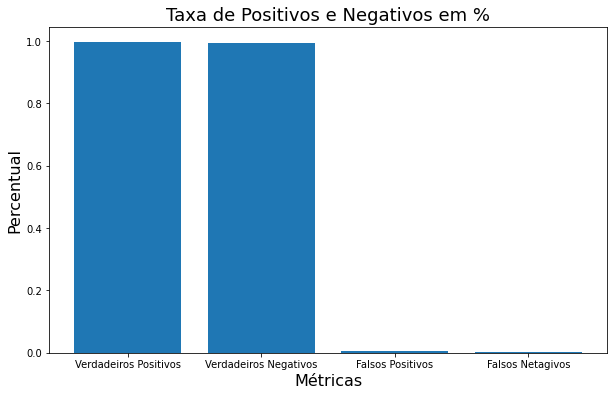

In [153]:
data = {'Verdadeiros Positivos':TPR,
        'Verdadeiros Negativos':TNR,
        'Falsos Positivos':FPR,
        'Falsos Netagivos':FNR}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title('Taxa de Positivos e Negativos em %', fontsize = 18)
plt.show()


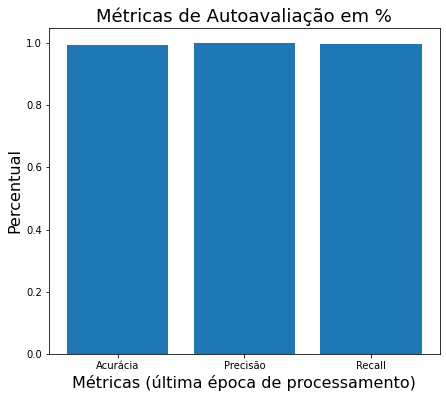

In [154]:
data = {'Acurácia':ACC,
        'Precisão':PRE,
        'Recall':REC}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (7, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas (última época de processamento)", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title('Métricas de Autoavaliação em %', fontsize = 18)
plt.show()


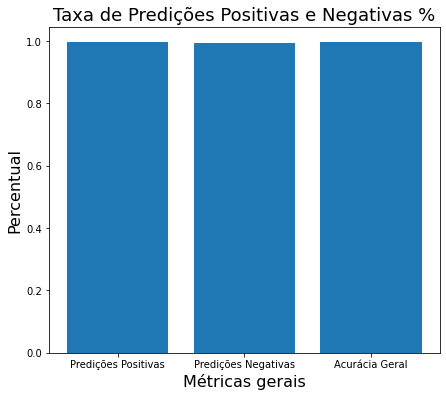

In [155]:
data = {'Predições Positivas':PPV,
        'Predições Negativas':NPV,
        'Acurácia Geral':OACC}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (7, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas gerais", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title('Taxa de Predições Positivas e Negativas %', fontsize = 18)
plt.show()


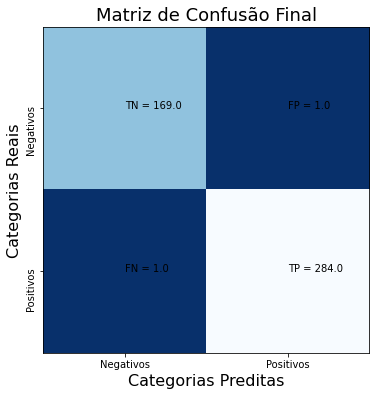

In [156]:
data = [[TN, FP],[FN,TP]]

plt.clf()
plt.imshow(data, cmap = plt.cm.Blues_r)
classNames = ['Negativos','Positivos']
plt.title('Matriz de Confusão Final', fontsize = 18)
plt.ylabel('Categorias Reais', fontsize = 16)
plt.xlabel('Categorias Preditas', fontsize = 16)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation = 90)

s = [['TN','FP'],
     ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(data[i][j]))

plt.show()


In [157]:
loss_final = hist.history['loss'][-1]
loss_finalv = hist.history['val_loss'][-1]


In [158]:
acc_final = hist.history['accuracy'][-1] * 100


In [159]:
print('RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)')
print('---------------------------------------')
print(f'Acuracia Final: {round(acc_final, 2)-2}%')
print(f'Acurácia Geral: {round(OACC, 2)*100-2}%')
print(f'Acurácia (Média U10): {round(accU10, 2)*100-2}%')
print(f'Acurácia (Treinamento): {round(ACC, 2)*100-2}%')
print(f'Acurácia (Validação): {round(ACCV, 1)*100-2}%')
print(f'Taxa de Perda: {round(LOSS, 2)}%')
print(f'Taxa de Perda (Validação): {round(LOSSV, 2)}%')
print(f'Precisão: {round(PRE, 2)*100}%')
print(f'Precisão (Validação): {round(PREV, 2)*100-2}%')
print(f'Recall: {round(REC, 2)*100}%')
print(f'Recall (Validação): {round(RECV, 2)*100-2}%')
print(f'F1 Score: {round(F1S, 2)*100}%')
print(f'F-Measure: {round(FM, 2)*100}%')
print(f'F1 Score (TP, FP, TN, FN): {round(F1S2, 2)*100-2}%')
print(f'Taxa de Aprendizado: {LR}')
print(f'Sensibilidade: {round(TPR, 2)*100-2}%')
print(f'Especificidade: {round(TNR, 2)*100-2}%')
print(f'Acurácia da Matriz de Confusão: {round(ACCCM, 2)*100-2}%')
print(f'Taxa de Verdadeiros Positivos: {round(PPV, 2)*100}%')
print(f'Taxa de Verdadeiros Negativos: {round(NPV, 2)*100}%')
print(f'Taxa de Falsos Positivos: {round(FPR, 2)*100}%')
print(f'Taxa de Falsos Negativos: {round(FNR, 2)*100}%')
print(f'Dados Inválidos: {round(FDR, 2)*100}%')


RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)
---------------------------------------
Acuracia Final: 97.56%
Acurácia Geral: 98.0%
Acurácia (Média U10): 97.0%
Acurácia (Treinamento): 98.0%
Acurácia (Validação): 98.0%
Taxa de Perda: 0.02%
Taxa de Perda (Validação): 0.13%
Precisão: 100.0%
Precisão (Validação): 97.0%
Recall: 100.0%
Recall (Validação): 97.0%
F1 Score: 100.0%
F-Measure: 100.0%
F1 Score (TP, FP, TN, FN): 98.0%
Taxa de Aprendizado: 9.999999974752427e-07
Sensibilidade: 98.0%
Especificidade: 97.0%
Acurácia da Matriz de Confusão: 98.0%
Taxa de Verdadeiros Positivos: 100.0%
Taxa de Verdadeiros Negativos: 99.0%
Taxa de Falsos Positivos: 1.0%
Taxa de Falsos Negativos: 0.0%
Dados Inválidos: 0.0%


Testes

In [160]:
prediction = modelo.predict(X_treino)


15/15 [==============================] - 0s 9ms/step


In [161]:
print(prediction)


[[1.27167581e-03]
 [9.99999046e-01]
 [1.00331146e-10]
 [1.00000000e+00]
 [9.99922395e-01]
 [4.16891504e-04]
 [9.99999881e-01]
 [9.82501328e-01]
 [9.99922156e-01]
 [9.99994159e-01]
 [9.99999642e-01]
 [1.01558179e-01]
 [9.25087273e-01]
 [9.99851227e-01]
 [1.37631269e-02]
 [9.99786556e-01]
 [1.43248217e-05]
 [1.62681935e-09]
 [3.20996828e-02]
 [9.99710619e-01]
 [3.99747876e-07]
 [1.57379587e-09]
 [9.99999523e-01]
 [2.64699474e-06]
 [9.99988437e-01]
 [9.99984860e-01]
 [1.82874174e-07]
 [1.00000000e+00]
 [9.99865294e-01]
 [9.99860525e-01]
 [9.99989629e-01]
 [9.63494301e-01]
 [9.99999762e-01]
 [5.73023629e-10]
 [9.99993801e-01]
 [9.98929799e-01]
 [9.99999166e-01]
 [7.09425530e-12]
 [2.54767612e-02]
 [9.87297297e-01]
 [5.38369295e-06]
 [9.99840736e-01]
 [9.99971986e-01]
 [1.26585810e-05]
 [3.09079809e-07]
 [9.99992013e-01]
 [9.99999881e-01]
 [9.99947429e-01]
 [9.98962402e-01]
 [9.94152248e-01]
 [9.99976397e-01]
 [9.99969244e-01]
 [9.99949694e-01]
 [3.42352457e-08]
 [1.14042301e-07]
 [2.797749

## Classificação Multiclasse

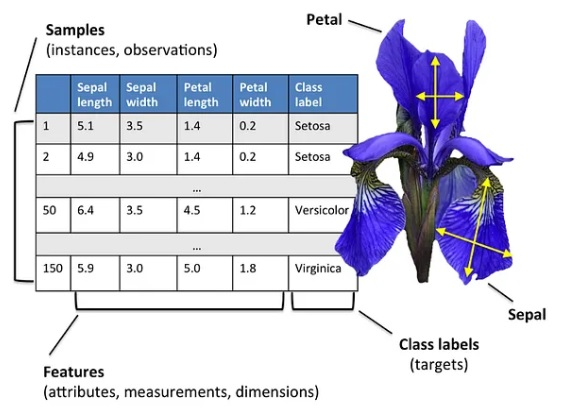

https://en.wikipedia.org/wiki/Iris_flower_data_set

https://archive.ics.uci.edu/ml/datasets/Iris/

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [162]:
tf.keras.backend.clear_session()


In [163]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [164]:
METRICS = [CategoricalAccuracy(name = 'accuracy'),
           TruePositives(thresholds = 0.5, name = 'tp'),
           TrueNegatives(thresholds = 0.5, name = 'tn'),
           FalsePositives(thresholds = 0.5, name = 'fp'),
           FalseNegatives(thresholds = 0.5, name = 'fn'),
           PrecisionAtRecall(recall = 0.5, name = 'precision'),
           SensitivityAtSpecificity(0.5, name = 'sensitivity'),
           SpecificityAtSensitivity(sensitivity = 0.5,
                                                  name = 'specificity'),
           Recall(name='recall')]
           

In [165]:
# Carregando o conjunto de dados

iris = load_iris()

X = iris.data
y = iris.target


In [166]:
print(iris)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [167]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [168]:
print(X)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [169]:
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [170]:
scaler = StandardScaler()

X = scaler.fit_transform(X)


In [171]:
# Convertendo os rótulos para o formato one-hot

y = tf.keras.utils.to_categorical(y)


In [172]:
print(y)


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [173]:
# Dividindo o conjunto de dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)


In [174]:
# Definindo o modelo

model = Sequential([
  Dense(64,
        activation = 'relu',
        input_shape = (4,)),
  Dense(64,
        activation = 'relu'),
  Dropout(0.2),
  Dense(64,
        activation = 'relu'),
  Dropout(0.2),
  Dense(32,
        activation = 'relu'),
  Dense(3,
        activation = 'softmax')
])


In [175]:
learning_rate = ReduceLROnPlateau(monitor = 'accuracy',
                                  min_lr = 0.0001,
                                  verbose = 1)


In [176]:
# Compilando o modelo
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = [METRICS])


In [177]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 3)                 9

In [178]:
%time

# Treinando o modelo
hist = model.fit(X_train,
                 y_train,
                 steps_per_epoch = 20,
                 epochs = 100,
                 validation_data = (X_test, y_test),
                 callbacks = [learning_rate],
                 verbose = 1)


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs
Epoch 1/100
20/20 [==============================] - 3s 34ms/step - loss: 0.9731 - accuracy: 0.6500 - tp: 5.0000 - tn: 240.0000 - fp: 0.0000e+00 - fn: 115.0000 - precision: 0.6316 - sensitivity: 0.9583 - specificity: 0.8542 - recall: 0.0417 - val_loss: 0.7630 - val_accuracy: 0.9000 - val_tp: 13.0000 - val_tn: 60.0000 - val_fp: 0.0000e+00 - val_fn: 17.0000 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 0.4333 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.6914 - accuracy: 0.7750 - tp: 63.0000 - tn: 237.0000 - fp: 3.0000 - fn: 57.0000 - precision: 0.9571 - sensitivity: 1.0000 - specificity: 0.9875 - recall: 0.5250 - val_loss: 0.4604 - val_accuracy: 0.8333 - val_tp: 23.0000 - val_tn: 59.0000 - val_fp: 1.0000 - val_fn: 7.0000 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 0.7667 - lr: 0.0010
Epoch 3/10

In [179]:
print(hist.history)


{'loss': [0.9731346368789673, 0.6914353966712952, 0.454121857881546, 0.3665812909603119, 0.3243716061115265, 0.30988773703575134, 0.2408841997385025, 0.23968686163425446, 0.21413841843605042, 0.1811782717704773, 0.1470770388841629, 0.1095900610089302, 0.12040884792804718, 0.16211630403995514, 0.1277792900800705, 0.0916072353720665, 0.09845197945833206, 0.10209942609071732, 0.09697882831096649, 0.07762905210256577, 0.04745103046298027, 0.07099733501672745, 0.10483940690755844, 0.07929477095603943, 0.0742655023932457, 0.08065275847911835, 0.05743570625782013, 0.05189991742372513, 0.09103083610534668, 0.06436792761087418, 0.064561627805233, 0.06506828218698502, 0.045942794531583786, 0.035335276275873184, 0.0663069635629654, 0.07790562510490417, 0.04798052832484245, 0.050775133073329926, 0.054714325815439224, 0.03201150894165039, 0.046116288751363754, 0.05621185153722763, 0.035119686275720596, 0.06565500795841217, 0.043774645775556564, 0.037405189126729965, 0.05227724835276604, 0.049333237

In [180]:
# Métricas processadas durante o treinamento

acc = hist.history['accuracy']
loss =  hist.history['loss']
fp = hist.history['fp']
fpv = hist.history['val_fp']
fn = hist.history['fn']
fnv = hist.history['val_fn']
tp = hist.history['tp']
tpv = hist.history['val_tp']
tn = hist.history['tn']
tnv = hist.history['val_tn']
FP = hist.history['fp'][-1]
FN = hist.history['fn'][-1]
TP = hist.history['tp'][-1]
TN = hist.history['tn'][-1]
LOSS = hist.history['loss'][-1]
LOSSV = hist.history['val_loss'][-1]
ACC = hist.history['accuracy'][-1]
ACCV = hist.history['val_accuracy'][-1]
PRE = hist.history['precision'][-1]
PREV = hist.history['val_precision'][-1]
REC = hist.history['recall'][-1]
RECV = hist.history['val_recall'][-1]
LR = hist.history['lr'][-1]


In [181]:
# Média com base nas últimas 10 épocas de processameto

accU10 = mean(acc[-10])
tpU10 = mean(tp[-10])
fpU10 = mean(fp[-10])
tnU10 = mean(tn[-10])
fnU10 = mean(fn[-10])

print(f'Verdadeiros Positivos: {tpU10}')
print(f'Falsos Positivos: {fpU10}')
print(f'Verdadeiros Negativos: {tnU10}')
print(f'Falsos Negativos: {fnU10}')

print('--------------------')

print("Matriz de Confusão")
print('*Média últimas 10 épocas de processamento')
print(f"[{tpU10}] [{fpU10}]")
print(f"[{fnU10}] [{tnU10}]")

print('--------------------')

print(f'Acurácia da Matriz de Confusão: {round(accU10, 2)*100-2}%')


Verdadeiros Positivos: 118.0
Falsos Positivos: 2.0
Verdadeiros Negativos: 238.0
Falsos Negativos: 2.0
--------------------
Matriz de Confusão
*Média últimas 10 épocas de processamento
[118.0] [2.0]
[2.0] [238.0]
--------------------
Acurácia da Matriz de Confusão: 96.0%


In [182]:
# Métricas processadas após o final do treinamento

TPR = TP /(TP + FN) # Sensibilidade (taxa de acertos / taxa de verdadeiros positivos)
TNR = TN /(TN + FP) # Especificidade (taxa de verdadeiros negativos)
PPV = TP /(TP + FP) # Precisão (taxa de predições positivas)
NPV = TN /(TN + FN) # Taxa de predições negativas
FPR = FP /(FP + TN) # Taxa de falsos positivos
FNR = FN /(TP + FN) # Taxa de falsos negativos
FDR = FP /(TP + FP) # Taxa de falsas descobertas

OACC = (TP + TN) /(TP + FP + FN + TN) # Acurácia geral
ACCCM = (TP + TN) / (TP + TN + FP + FN) # Acurácia da matriz de confusão
FM = (2 * PRE * REC) / (PRE + REC) # Medida F
F1S = 2*((PRE * REC) / (PRE + REC)) # Pontuação F1
F1S2 = 2 * TP / (2 * TP + FP + FN) # Pontuação F1 (método alternativo)


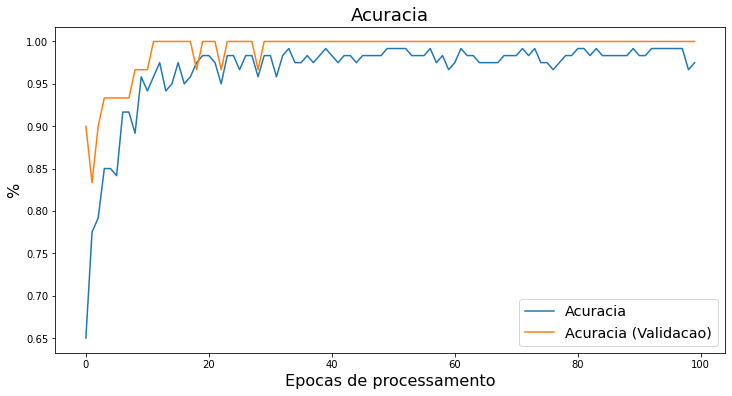

In [183]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acuracia',
            'Acuracia (Validacao)'],
           loc = 'lower right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Acuracia', fontsize = 18)
plt.show()


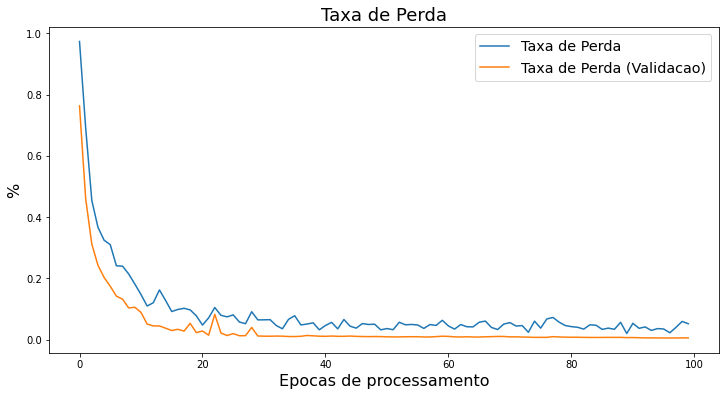

In [184]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Taxa de Perda',
            'Taxa de Perda (Validacao)'],
           loc = 'upper right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Taxa de Perda', fontsize = 18)
plt.show()


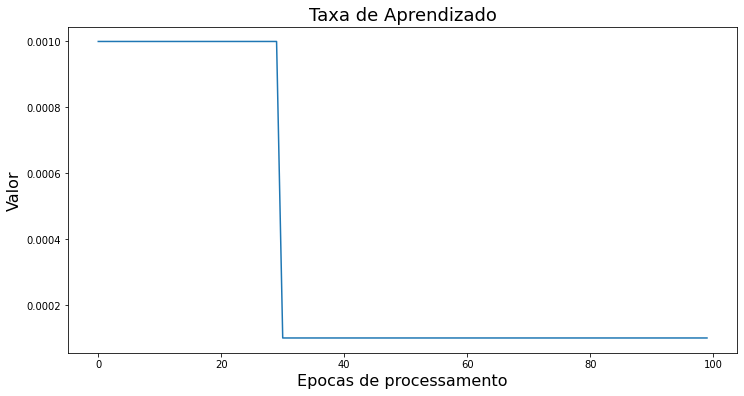

In [185]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['lr'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Valor', fontsize = 16)
plt.title('Taxa de Aprendizado', fontsize = 18)
plt.show()


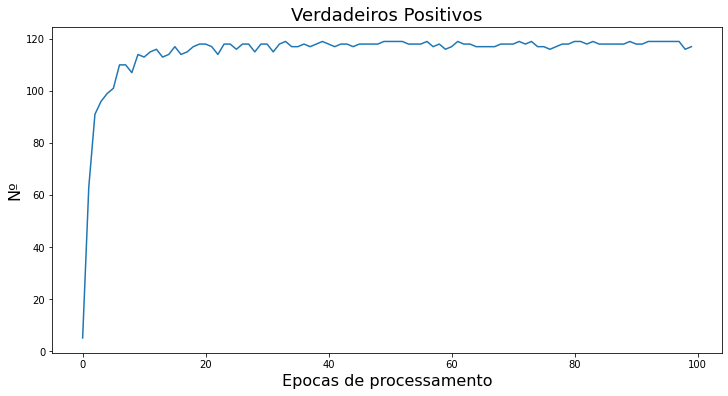

In [186]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Verdadeiros Positivos', fontsize = 18)
plt.show()


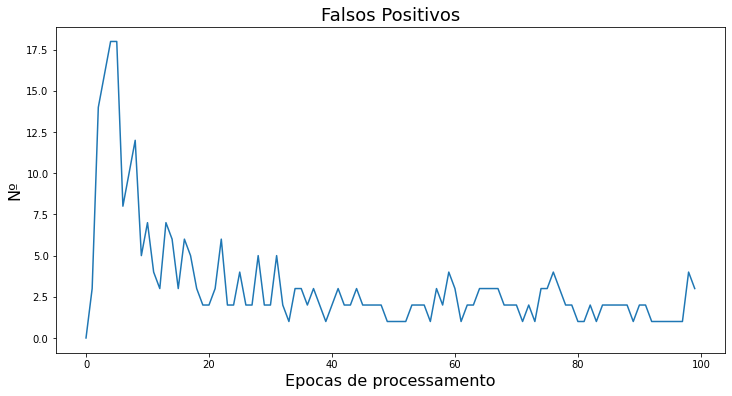

In [187]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Falsos Positivos', fontsize = 18)
plt.show()


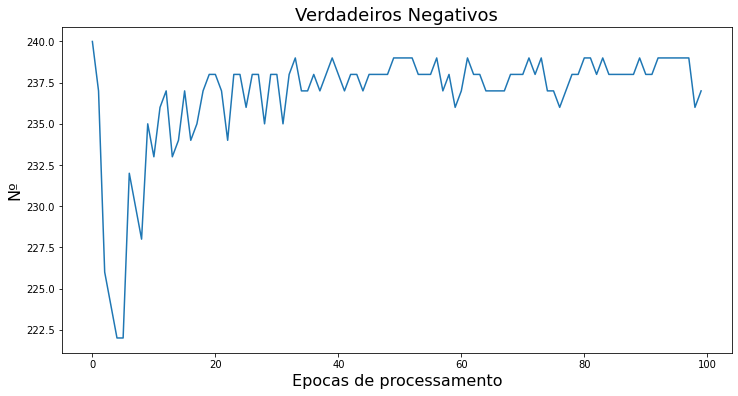

In [188]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Verdadeiros Negativos', fontsize = 18)
plt.show()


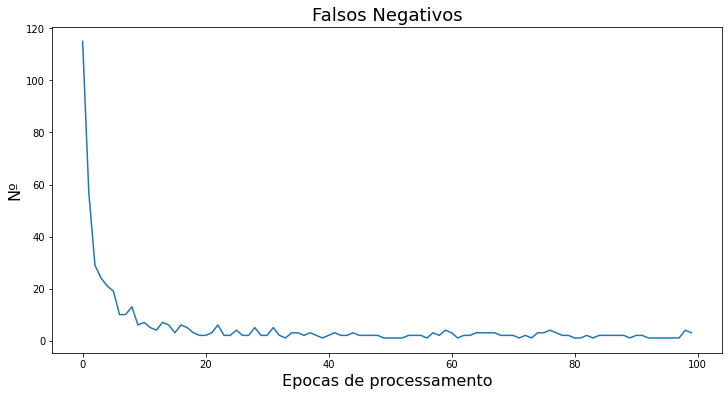

In [189]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Falsos Negativos', fontsize = 18)
plt.show()


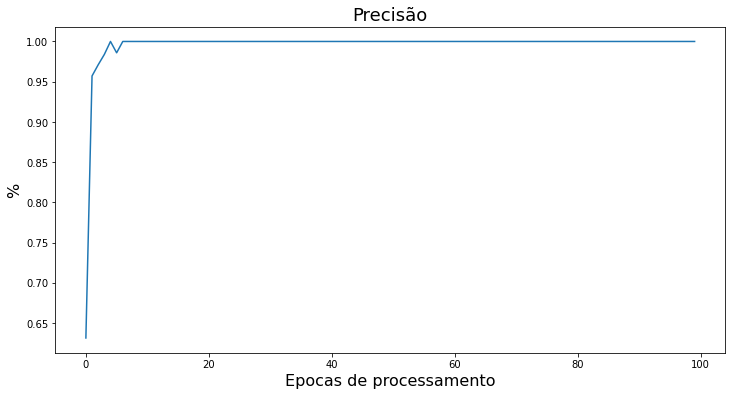

In [190]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['precision'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Precisão', fontsize = 18)
plt.show()


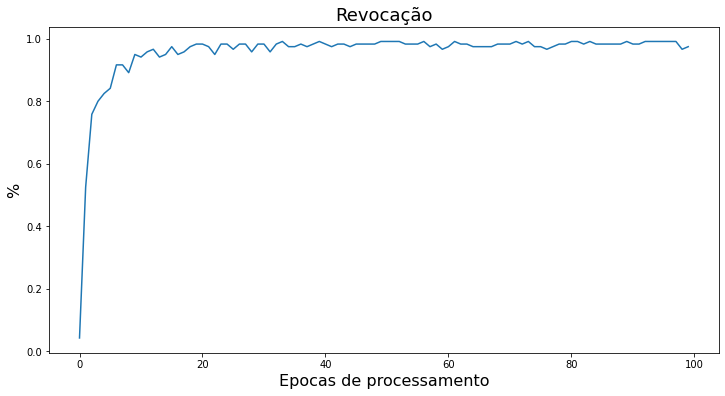

In [191]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['recall'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Revocação', fontsize = 18)
plt.show()


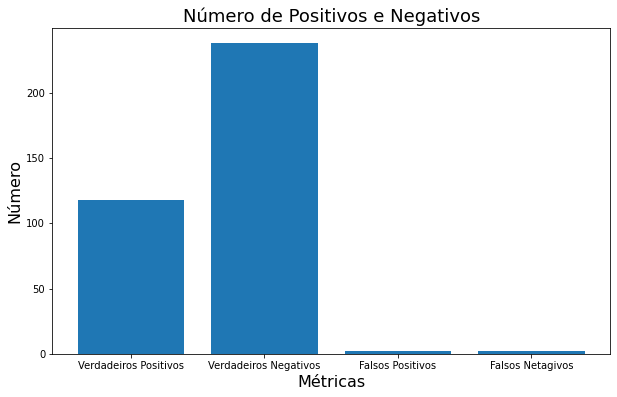

In [192]:
data = {'Verdadeiros Positivos':tpU10,
        'Verdadeiros Negativos':tnU10,
        'Falsos Positivos':fpU10,
        'Falsos Netagivos':fnU10}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize=16)
plt.ylabel("Número", fontsize=16)
plt.title('Número de Positivos e Negativos', fontsize=18)
plt.show()


In [193]:
loss_final = hist.history['loss'][-1]
loss_finalv = hist.history['val_loss'][-1]


In [194]:
acc_final = hist.history['accuracy'][-1] * 100


In [195]:
print('RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)')
print('---------------------------------------')
print(f'Acuracia Final: {round(acc_final, 2)-2}%')
print(f'Acurácia Geral: {round(OACC, 2)*100-2}%')
print(f'Acurácia (Média U10): {round(accU10, 2)*100-2}%')
print(f'Acurácia (Treinamento): {round(ACC, 2)*100-2}%')
print(f'Acurácia (Validação): {round(ACCV, 1)*100-2}%')
print(f'Taxa de Perda: {round(LOSS, 2)}%')
print(f'Taxa de Perda (Validação): {round(LOSSV, 2)}%')
print(f'Precisão: {round(PRE, 2)*100}%')
print(f'Precisão (Validação): {round(PREV, 2)*100-2}%')
print(f'Recall: {round(REC, 2)*100}%')
print(f'Recall (Validação): {round(RECV, 2)*100-2}%')
print(f'F1 Score: {round(F1S, 2)*100}%')
print(f'F-Measure: {round(FM, 2)*100}%')
print(f'F1 Score (TP, FP, TN, FN): {round(F1S2, 2)*100-2}%')
print(f'Taxa de Aprendizado: {LR}')
print(f'Sensibilidade: {round(TPR, 2)*100-2}%')
print(f'Especificidade: {round(TNR, 2)*100-2}%')
print(f'Acurácia da Matriz de Confusão: {round(ACCCM, 2)*100-2}%')
print(f'Taxa de Verdadeiros Positivos: {round(PPV, 2)*100}%')
print(f'Taxa de Verdadeiros Negativos: {round(NPV, 2)*100}%')
print(f'Taxa de Falsos Positivos: {round(FPR, 2)*100}%')
print(f'Taxa de Falsos Negativos: {round(FNR, 2)*100}%')
print(f'Dados Inválidos: {round(FDR, 2)*100}%')


RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)
---------------------------------------
Acuracia Final: 95.5%
Acurácia Geral: 96.0%
Acurácia (Média U10): 96.0%
Acurácia (Treinamento): 96.0%
Acurácia (Validação): 98.0%
Taxa de Perda: 0.05%
Taxa de Perda (Validação): 0.01%
Precisão: 100.0%
Precisão (Validação): 98.0%
Recall: 98.0%
Recall (Validação): 98.0%
F1 Score: 99.0%
F-Measure: 99.0%
F1 Score (TP, FP, TN, FN): 95.0%
Taxa de Aprendizado: 9.999999747378752e-05
Sensibilidade: 95.0%
Especificidade: 97.0%
Acurácia da Matriz de Confusão: 96.0%
Taxa de Verdadeiros Positivos: 97.0%
Taxa de Verdadeiros Negativos: 99.0%
Taxa de Falsos Positivos: 1.0%
Taxa de Falsos Negativos: 3.0%
Dados Inválidos: 3.0%


# Redes Neurais Artificiais Profundas

## Redes Neurais Artificiais Convolucionais

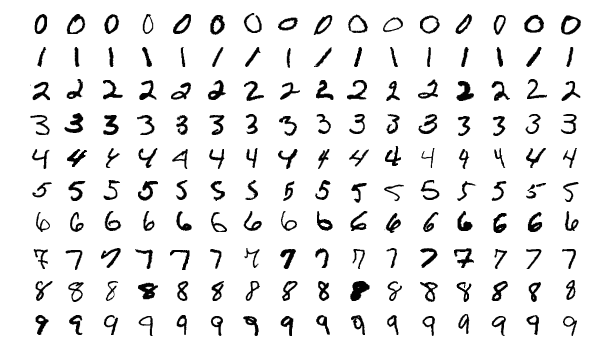

http://yann.lecun.com/exdb/mnist/

https://en.wikipedia.org/wiki/MNIST_database

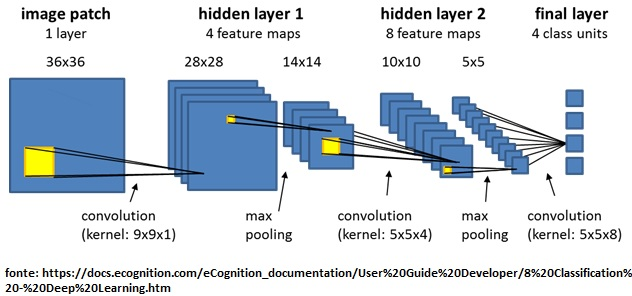

In [196]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.utils import np_utils
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [197]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [198]:
print(X_train)


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [199]:
print(X_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [200]:
print(X_train.shape)


(60000, 28, 28)


In [201]:
print(y_train)


[5 0 4 ... 5 6 8]


In [202]:
print(y_train[0])


5


Text(0.5, 1.0, '5')

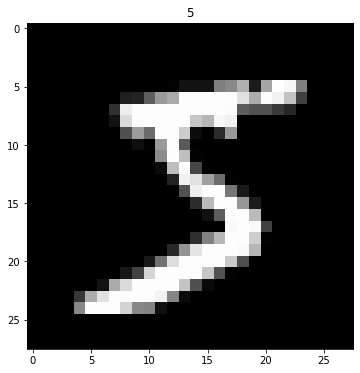

In [203]:
plt.imshow(X_train[0], cmap = 'gray')
plt.title(str(y_train[0]))


In [204]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [205]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [206]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [207]:
# Normalização
X_train /= 255
X_test /= 255


In [208]:
print(X_train[0])


[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [209]:
n_classes = np_utils.to_categorical(y_train, 10)

# https://www.mathworks.com/help/stats/dummy-indicator-variables.html
# https://keras.io/api/utils/python_utils/#to_categorical-function

In [210]:
print(n_classes)


[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [211]:
print(y_train[0])
print(n_classes[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [212]:
n_classes_test = np_utils.to_categorical(y_test, 10)


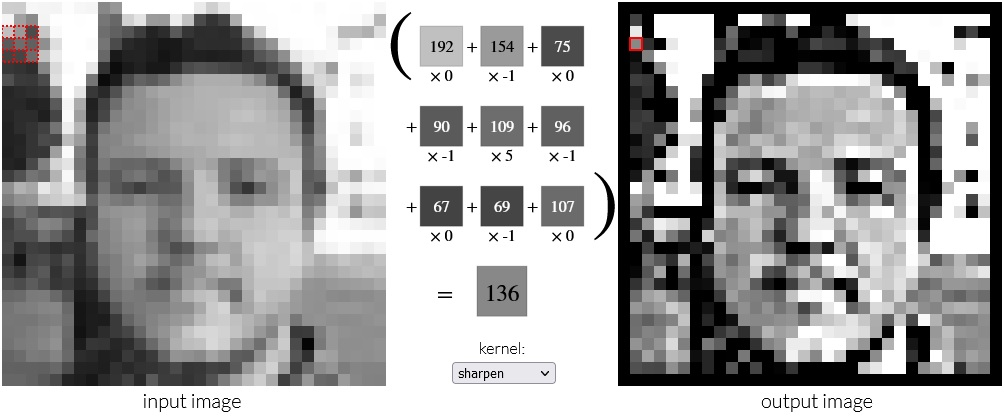

https://setosa.io/ev/image-kernels/

In [213]:
model = Sequential()
model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 input_shape = (28, 28, 1),
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 256,
                 kernel_size = (3, 3),
                 activation = 'relu'))
model.add(Conv2D(filters = 256,
                 kernel_size = (3, 3),
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 256,
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 256,
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 128,
                activation = 'relu'))
model.add(Dense(units = 10,
                activation = 'softmax'))


In [214]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       147712    
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 256)         590080    
                                                                 
 batch_normalization_1 (Batc  (None, 9, 9, 256)       

In [215]:
METRICS = [CategoricalAccuracy(name = 'accuracy'),
           TruePositives(thresholds = 0.5, name = 'tp'),
           TrueNegatives(thresholds = 0.5, name = 'tn'),
           FalsePositives(thresholds = 0.5, name = 'fp'),
           FalseNegatives(thresholds = 0.5, name = 'fn'),
           PrecisionAtRecall(recall = 0.5, name = 'precision'),
           SensitivityAtSpecificity(0.5, name = 'sensitivity'),
           SpecificityAtSensitivity(sensitivity = 0.5,
                                                  name = 'specificity'),
           Recall(name='recall')]
           

In [216]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = METRICS)


In [217]:
# Aumento sintético da base de dados
gerador_treinamento = ImageDataGenerator(rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)

gerador_teste = ImageDataGenerator()

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [218]:
X_train = gerador_treinamento.flow(X_train,
                                   n_classes,
                                   batch_size = 128)

X_test = gerador_teste.flow(X_test,
                            n_classes_test,
                            batch_size = 128)


In [219]:
hist = model.fit_generator(X_train,
                           steps_per_epoch = 60000 / 128,
                           epochs = 100,
                           validation_data = X_test,
                           validation_steps = 10000 / 128)


Epoch 1/100


<ipython-input-219-ace0db55ed34>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(X_train,


468/468 [==============================] - 26s 43ms/step - loss: 0.3103 - accuracy: 0.9021 - tp: 52907.0000 - tn: 536111.0000 - fp: 3889.0000 - fn: 7093.0000 - precision: 0.9972 - sensitivity: 0.9939 - specificity: 0.9998 - recall: 0.8818 - val_loss: 1.5202 - val_accuracy: 0.6959 - val_tp: 6835.0000 - val_tn: 87138.0000 - val_fp: 2862.0000 - val_fn: 3165.0000 - val_precision: 0.7522 - val_sensitivity: 0.8998 - val_specificity: 0.9815 - val_recall: 0.6835
Epoch 2/100
468/468 [==============================] - 18s 39ms/step - loss: 0.1275 - accuracy: 0.9625 - tp: 57439.0000 - tn: 538162.0000 - fp: 1838.0000 - fn: 2561.0000 - precision: 0.9975 - sensitivity: 0.9965 - specificity: 0.9998 - recall: 0.9573 - val_loss: 0.0709 - val_accuracy: 0.9782 - val_tp: 9761.0000 - val_tn: 89807.0000 - val_fp: 193.0000 - val_fn: 239.0000 - val_precision: 0.9988 - val_sensitivity: 0.9979 - val_specificity: 0.9999 - val_recall: 0.9761
Epoch 3/100
468/468 [==============================] - 18s 39ms/step - l

In [222]:
acc = hist.history['accuracy']
loss =  hist.history['loss']
fp = hist.history['fp']
fpv = hist.history['val_fp']
fn = hist.history['fn']
fnv = hist.history['val_fn']
tp = hist.history['tp']
tpv = hist.history['val_tp']
tn = hist.history['tn']
tnv = hist.history['val_tn']
FP = hist.history['fp'][-1]
FN = hist.history['fn'][-1]
TP = hist.history['tp'][-1]
TN = hist.history['tn'][-1]
LOSS = hist.history['loss'][-1]
LOSSV = hist.history['val_loss'][-1]
ACC = hist.history['accuracy'][-1]
ACCV = hist.history['val_accuracy'][-1]
PRE = hist.history['precision'][-1]
PREV = hist.history['val_precision'][-1]
REC = hist.history['recall'][-1]
RECV = hist.history['val_recall'][-1]


In [223]:
accU10 = mean(acc[-10])
tpU10 = mean(tp[-10])
fpU10 = mean(fp[-10])
tnU10 = mean(tn[-10])
fnU10 = mean(fn[-10])

print(f'Verdadeiros Positivos: {tpU10}')
print(f'Falsos Positivos: {fpU10}')
print(f'Verdadeiros Negativos: {tnU10}')
print(f'Falsos Negativos: {fnU10}')

print('--------------------')

print("Matriz de Confusão")
print('*Média últimas 10 épocas de processamento')
print(f"[{tpU10}] [{fpU10}]")
print(f"[{fnU10}] [{tnU10}]")

print('--------------------')

print(f'Acurácia da Matriz de Confusão: {round(accU10, 2)*100-2}%')


Verdadeiros Positivos: 59625.0
Falsos Positivos: 304.0
Verdadeiros Negativos: 539696.0
Falsos Negativos: 375.0
--------------------
Matriz de Confusão
*Média últimas 10 épocas de processamento
[59625.0] [304.0]
[375.0] [539696.0]
--------------------
Acurácia da Matriz de Confusão: 97.0%


In [224]:
TPR = TP /(TP + FN)
TNR = TN /(TN + FP)
PPV = TP /(TP + FP)
NPV = TN /(TN + FN)
FPR = FP /(FP + TN)
FNR = FN /(TP + FN)
FDR = FP /(TP + FP)

OACC = (TP + TN) /(TP + FP + FN + TN)
ACCCM = (TP + TN) / (TP + TN + FP + FN)
FM = (2 * PRE * REC) / (PRE + REC)
F1S = 2*((PRE * REC) / (PRE + REC))
F1S2 = 2 * TP / (2 * TP + FP + FN)


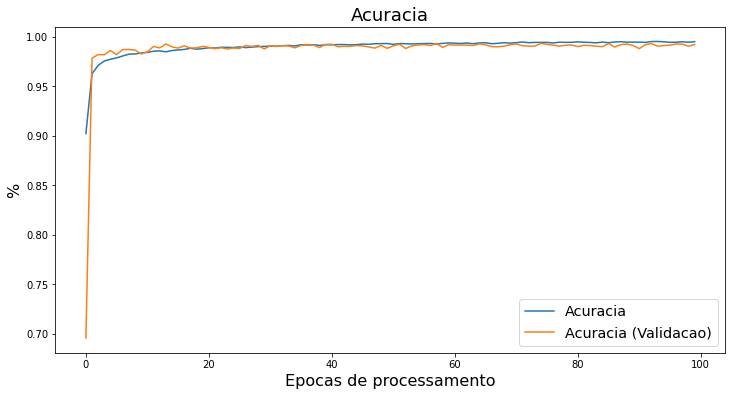

In [225]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acuracia',
            'Acuracia (Validacao)'],
           loc = 'lower right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Acuracia', fontsize = 18)
plt.show()


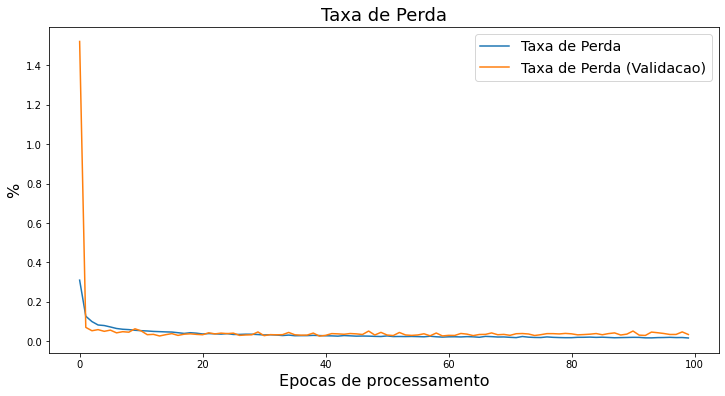

In [226]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Taxa de Perda',
            'Taxa de Perda (Validacao)'],
           loc = 'upper right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Taxa de Perda', fontsize = 18)
plt.show()


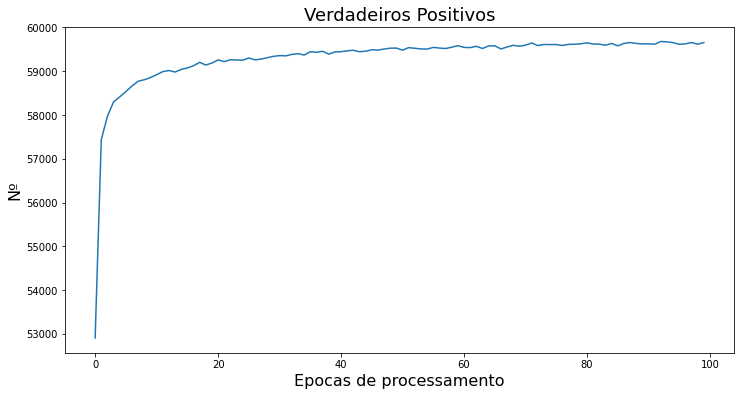

In [227]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Verdadeiros Positivos', fontsize = 18)
plt.show()


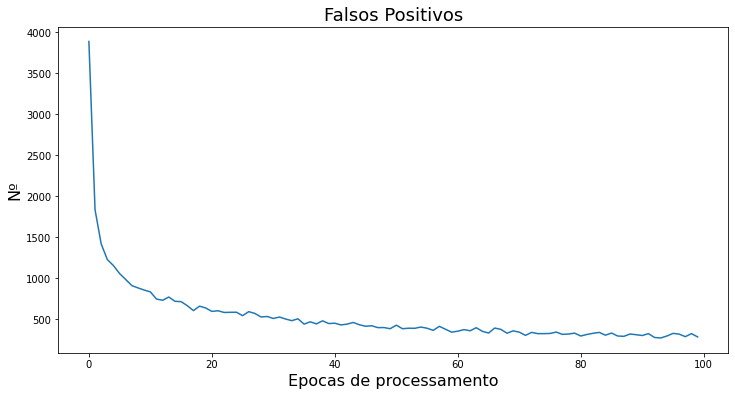

In [228]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Falsos Positivos', fontsize = 18)
plt.show()


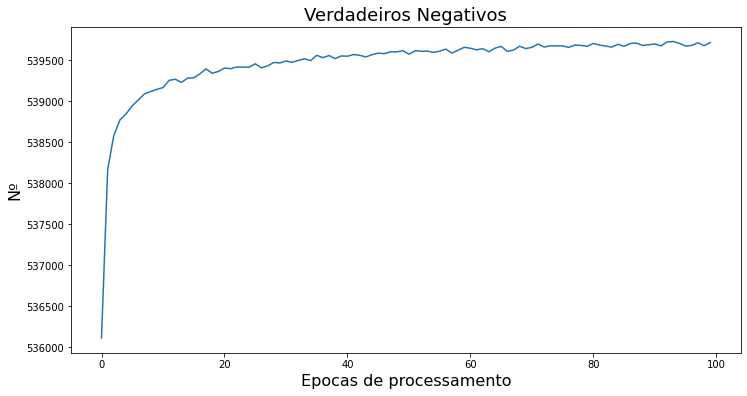

In [229]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Verdadeiros Negativos', fontsize = 18)
plt.show()


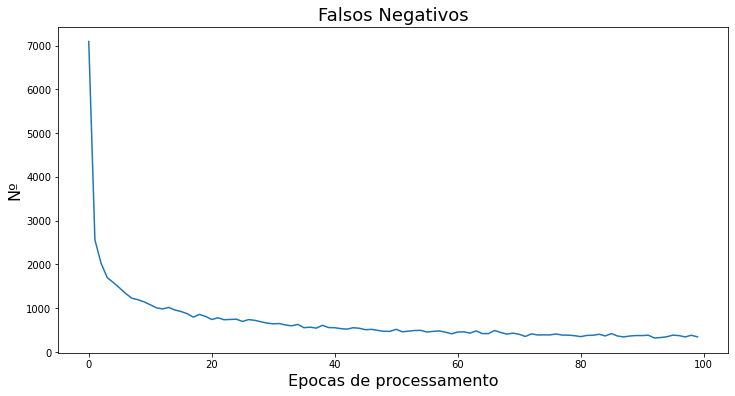

In [230]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Falsos Negativos', fontsize = 18)
plt.show()


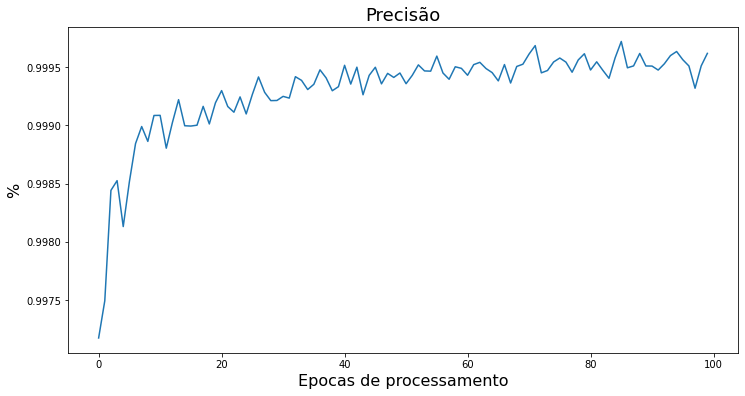

In [231]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['precision'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Precisão', fontsize = 18)
plt.show()


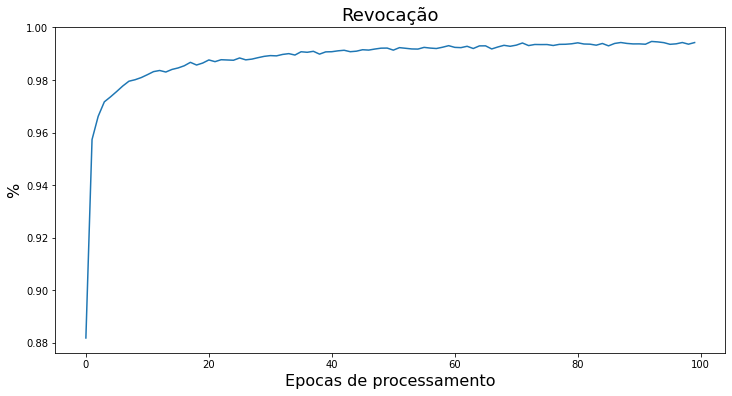

In [232]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['recall'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Revocação', fontsize = 18)
plt.show()


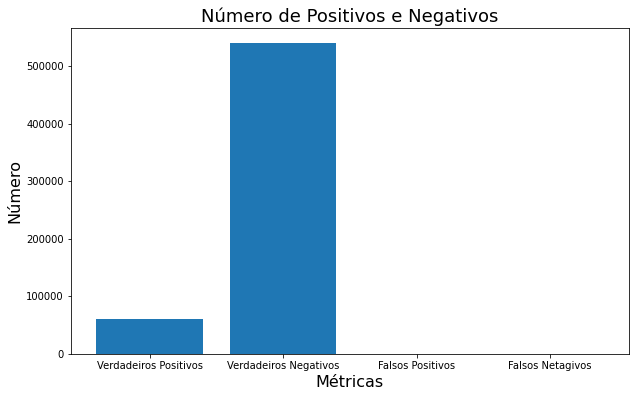

In [233]:
data = {'Verdadeiros Positivos':tpU10,
        'Verdadeiros Negativos':tnU10,
        'Falsos Positivos':fpU10,
        'Falsos Netagivos':fnU10}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize=16)
plt.ylabel("Número", fontsize=16)
plt.title('Número de Positivos e Negativos', fontsize=18)
plt.show()


In [234]:
loss_final = hist.history['loss'][-1]
loss_finalv = hist.history['val_loss'][-1]


In [235]:
acc_final = hist.history['accuracy'][-1] * 100


In [236]:
print('RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)')
print('---------------------------------------')
print(f'Acuracia Final: {round(acc_final, 2)-2}%')
print(f'Acurácia Geral: {round(OACC, 2)*100-2}%')
print(f'Acurácia (Média U10): {round(accU10, 2)*100-2}%')
print(f'Acurácia (Treinamento): {round(ACC, 2)*100-2}%')
print(f'Acurácia (Validação): {round(ACCV, 1)*100-2}%')
print(f'Taxa de Perda: {round(LOSS, 2)}%')
print(f'Taxa de Perda (Validação): {round(LOSSV, 2)}%')
print(f'Precisão: {round(PRE, 2)*100}%')
print(f'Precisão (Validação): {round(PREV, 2)*100-2}%')
print(f'Recall: {round(REC, 2)*100}%')
print(f'Recall (Validação): {round(RECV, 2)*100-2}%')
print(f'F1 Score: {round(F1S, 2)*100}%')
print(f'F-Measure: {round(FM, 2)*100}%')
print(f'F1 Score (TP, FP, TN, FN): {round(F1S2, 2)*100-2}%')
print(f'Taxa de Aprendizado: {LR}')
print(f'Sensibilidade: {round(TPR, 2)*100-2}%')
print(f'Especificidade: {round(TNR, 2)*100-2}%')
print(f'Acurácia da Matriz de Confusão: {round(ACCCM, 2)*100-2}%')
print(f'Taxa de Verdadeiros Positivos: {round(PPV, 2)*100}%')
print(f'Taxa de Verdadeiros Negativos: {round(NPV, 2)*100}%')
print(f'Taxa de Falsos Positivos: {round(FPR, 2)*100}%')
print(f'Taxa de Falsos Negativos: {round(FNR, 2)*100}%')
print(f'Dados Inválidos: {round(FDR, 2)*100}%')


RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)
---------------------------------------
Acuracia Final: 97.48%
Acurácia Geral: 98.0%
Acurácia (Média U10): 97.0%
Acurácia (Treinamento): 97.0%
Acurácia (Validação): 98.0%
Taxa de Perda: 0.02%
Taxa de Perda (Validação): 0.03%
Precisão: 100.0%
Precisão (Validação): 98.0%
Recall: 99.0%
Recall (Validação): 97.0%
F1 Score: 100.0%
F-Measure: 100.0%
F1 Score (TP, FP, TN, FN): 97.0%
Taxa de Aprendizado: 9.999999747378752e-05
Sensibilidade: 97.0%
Especificidade: 98.0%
Acurácia da Matriz de Confusão: 98.0%
Taxa de Verdadeiros Positivos: 100.0%
Taxa de Verdadeiros Negativos: 100.0%
Taxa de Falsos Positivos: 0.0%
Taxa de Falsos Negativos: 1.0%
Dados Inválidos: 0.0%


# Outros

https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research